In [8]:
import re
import argparse
import matplotlib.pyplot as plt
import numpy as np
import os

def parse_stat_file(filename, num_requests=None):
    """Parse vLLM stats file and extract TTFT, ITL, and TPOT metrics."""
    with open(filename, 'r') as f:
        content = f.read()
    
    # Extract TTFT values
    ttft_values = []
    ttft_matches = re.findall(r'ttft:\[(.*?)\]', content)
    for match in ttft_matches:
        values = [float(x.strip()) for x in match.split(',')]
        ttft_values.extend(values)
    
    # Auto-detect num_requests if not provided
    if num_requests is None:
        num_requests = len(ttft_values)
    
    # Extract ITL values
    itl_values = [None] * num_requests
    itl_matches = re.findall(r'itl_(\d+):(.*?)(?:\n|$)', content)
    for idx_str, val_str in itl_matches:
        request_num = int(idx_str)
        if request_num < num_requests:
            itl_values[request_num] = float(val_str.strip())
    
    # Extract TPOT values (first value of each tpot list)
    tpot_values = []
    tpot_matches = re.findall(r'tpot:\[(.*?)\]', content)
    for match in tpot_matches:
        values = [float(x.strip()) for x in match.split(',')]
        if values:
            tpot_values.append(values[0])
    
    # Limit to the specified number of requests
    ttft_values = ttft_values[:num_requests]
    tpot_values = tpot_values[:num_requests]
    
    return ttft_values, itl_values, tpot_values

def plot_metrics(ttft_values, itl_values, tpot_values, filename):
    """Create plots for TTFT, ITL, and TPOT metrics."""
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    
    # Plot TTFT
    axes[0].plot(range(1, len(ttft_values) + 1), ttft_values, 'o', color='blue')
    axes[0].set_xticks(np.arange(0, len(ttft_values) ,5))
    axes[0].set_title('Time to First Token (TTFT)')
    axes[0].set_xlabel('Request Number')
    axes[0].set_ylabel('Time (seconds)')
    axes[0].grid(True)
    
    # Plot ITL
    x_vals = []
    y_vals = []
    for i, val in enumerate(itl_values):
        if val is not None:
            x_vals.append(i + 1)
            y_vals.append(val)
    
    axes[1].plot(x_vals, y_vals, 'o', color='green')
    axes[1].set_xticks(np.arange(0, len(ttft_values) ,5))
    axes[1].set_title('Inter-Token Latency (ITL)')
    axes[1].set_xlabel('Request Number')
    axes[1].set_ylabel('Time (seconds)')
    axes[1].grid(True)
    
    # Plot TPOT
    axes[2].plot(range(1, len(tpot_values) + 1), tpot_values, 'o', color='red')
    axes[2].set_xticks(np.arange(0, len(ttft_values) ,5))
    axes[2].set_title('Throughput Over Time (TPOT)')
    axes[2].set_xlabel('Request Number')
    axes[2].set_ylabel('Time (seconds)')
    axes[2].grid(True)
    
    plt.tight_layout()
    
    # Save the plot
    output_file = os.path.splitext(filename)[0] + "_plot.png"
    plt.savefig(output_file)
    print(f"Plot saved as: {output_file}")
    
    return fig

def print_statistics(ttft_values, itl_values, tpot_values):
    """Print summary statistics for each metric."""
    print("\nSummary Statistics:")
    print("-" * 50)
    
    # TTFT stats
    print(f"TTFT: min={min(ttft_values):.6f}s, max={max(ttft_values):.6f}s, " 
          f"avg={np.mean(ttft_values):.6f}s")
    
    # ITL stats
    valid_itl = [v for v in itl_values if v is not None]
    if valid_itl:
        print(f"ITL:  min={min(valid_itl):.6f}s, max={max(valid_itl):.6f}s, "
              f"avg={np.mean(valid_itl):.6f}s")
    else:
        print("ITL:  No valid data")
    
    # TPOT stats
    if tpot_values:
        print(f"TPOT: min={min(tpot_values):.6f}s, max={max(tpot_values):.6f}s, "
              f"avg={np.mean(tpot_values):.6f}s")
    else:
        print("TPOT: No valid data")

In [9]:
def mai(filename,num_requests):

    # Parse the file
    ttft_values, itl_values, tpot_values = parse_stat_file(
        filename, num_requests
    )
    
    num_requests = len(ttft_values)
    print(f"Processing {num_requests} requests from file: {filename}")
    
    # Print statistics
    print_statistics(ttft_values, itl_values, tpot_values)
    
    # Create and display the plots
    fig = plot_metrics(ttft_values, itl_values, tpot_values, filename)
    plt.show()

Processing 20 requests from file: /home/hkngae/vllm/fypStats/local_NVlink/stat_20.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.253350s, max=0.264289s, avg=0.256134s
ITL:  min=0.024717s, max=0.025108s, avg=0.025068s
TPOT: min=0.019579s, max=0.040082s, avg=0.024914s
Plot saved as: /home/hkngae/vllm/fypStats/local_NVlink/stat_20_plot.png


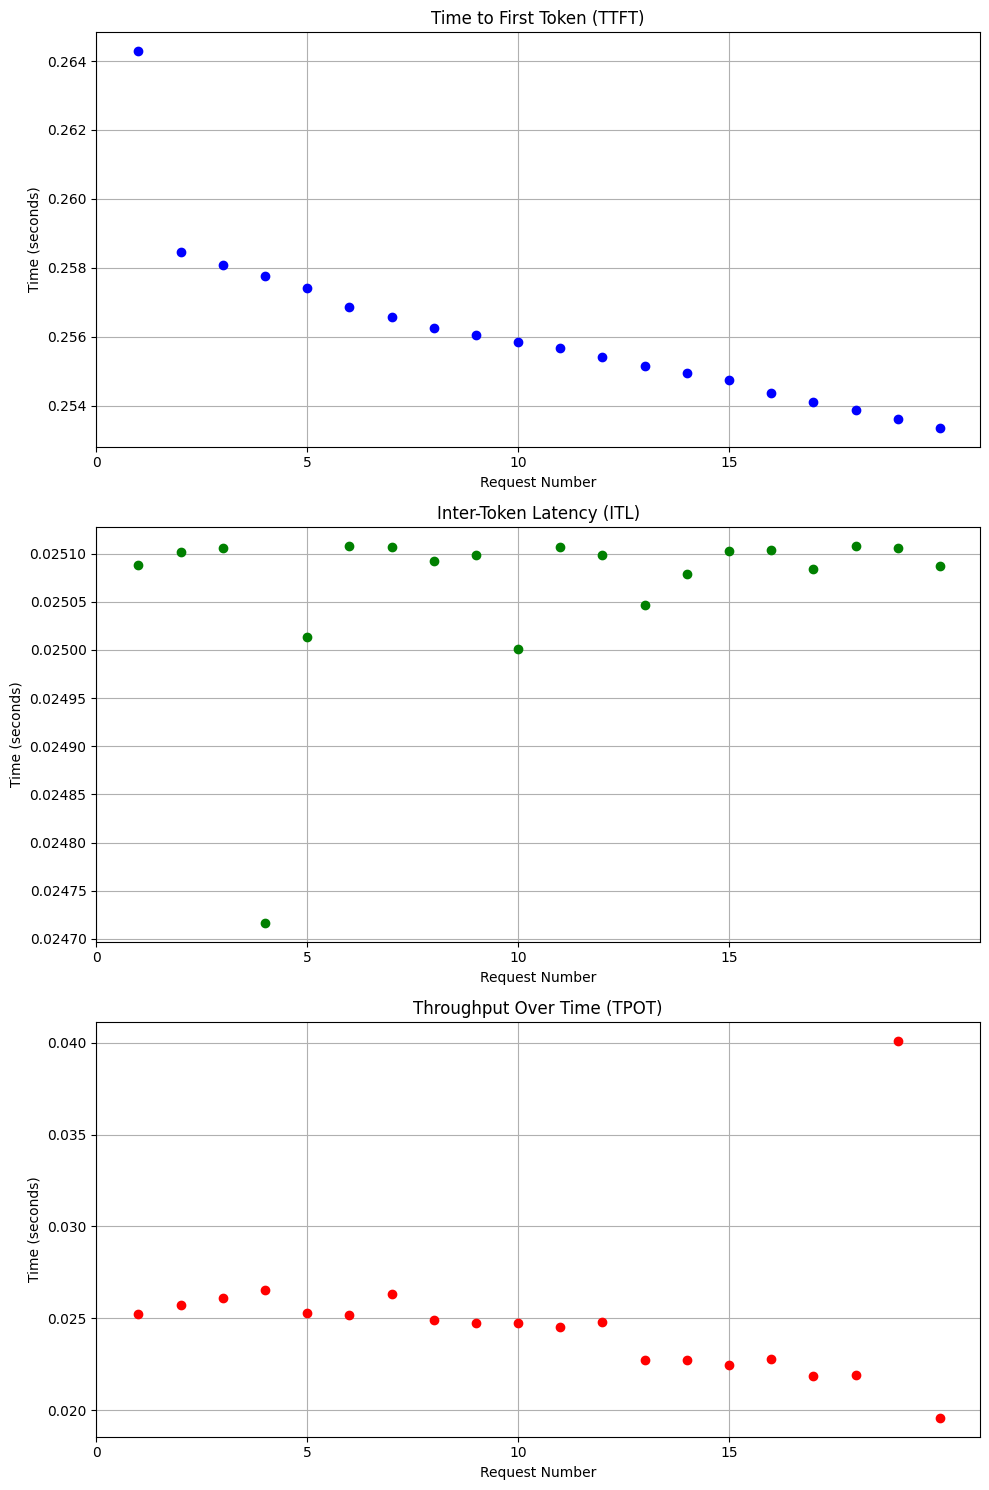

In [10]:
filename = "/home/hkngae/vllm/fypStats/local_NVlink/stat_20.txt"
num_requests = 20
mai(filename, num_requests)

Processing 40 requests from file: /home/hkngae/vllm/fypStats/local_NVlink/stat_40.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.489163s, max=0.504602s, avg=0.494075s
ITL:  min=0.029876s, max=0.030167s, avg=0.030062s
TPOT: min=0.019433s, max=0.039865s, avg=0.027203s
Plot saved as: /home/hkngae/vllm/fypStats/local_NVlink/stat_40_plot.png


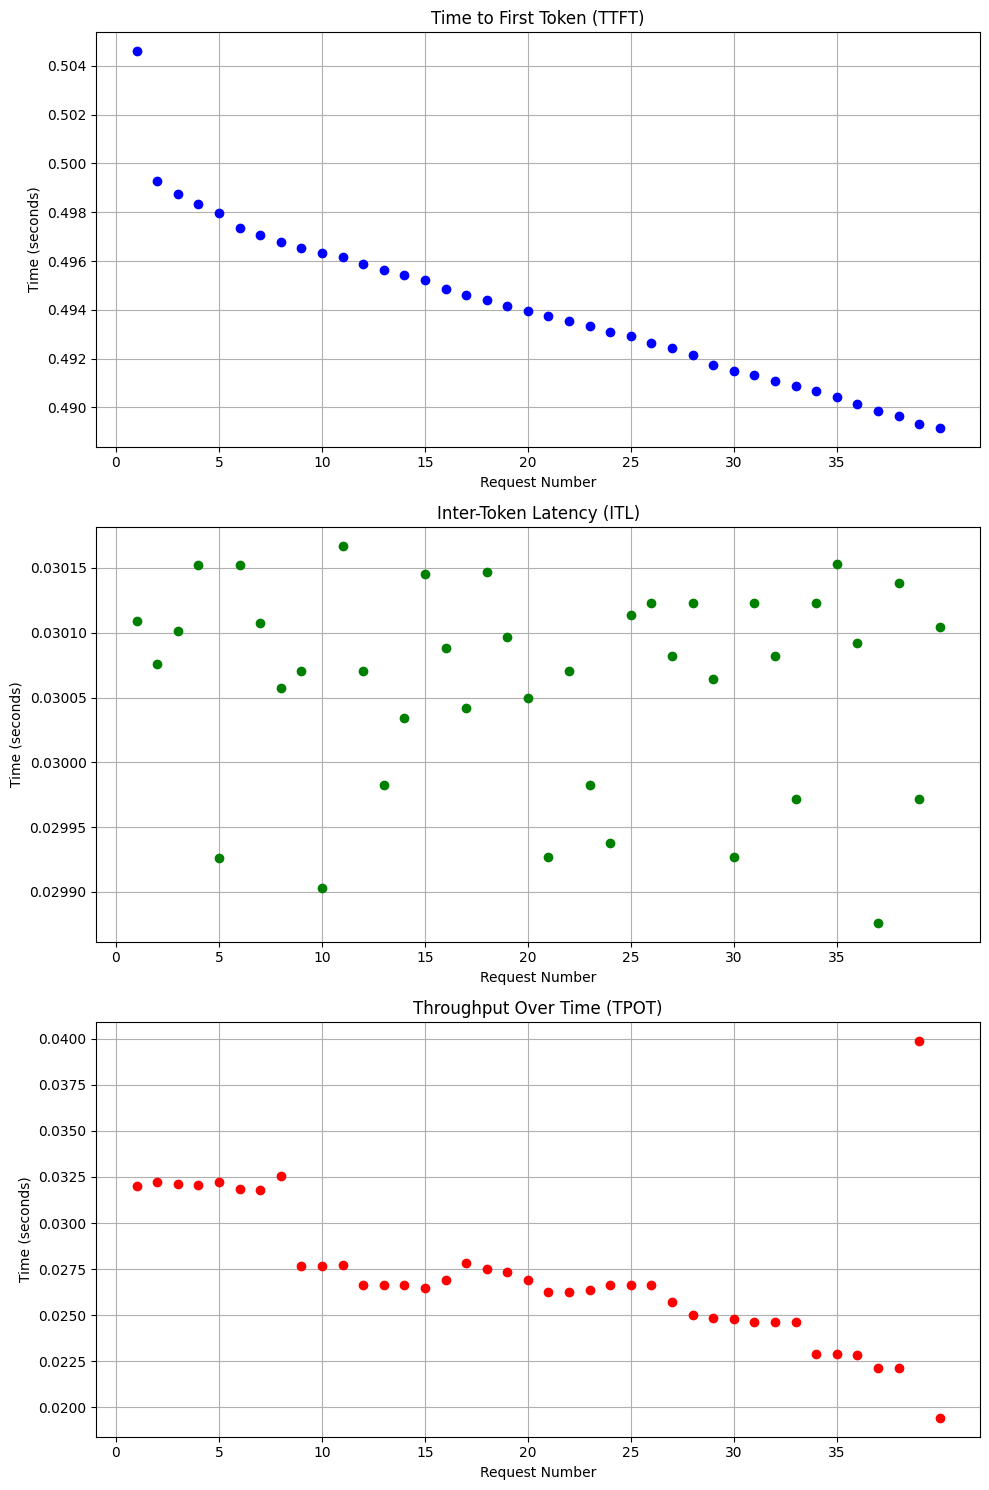

In [11]:
filename = "/home/hkngae/vllm/fypStats/local_NVlink/stat_40.txt"
num_requests = 40
mai(filename, num_requests)

Processing 80 requests from file: /home/hkngae/vllm/fypStats/local_NVlink/stat_80.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=1.184243s, max=22.502145s, avg=11.313306s
ITL:  min=0.029583s, max=0.031537s, avg=0.030727s
TPOT: min=0.019720s, max=0.064577s, avg=0.032071s
Plot saved as: /home/hkngae/vllm/fypStats/local_NVlink/stat_80_plot.png


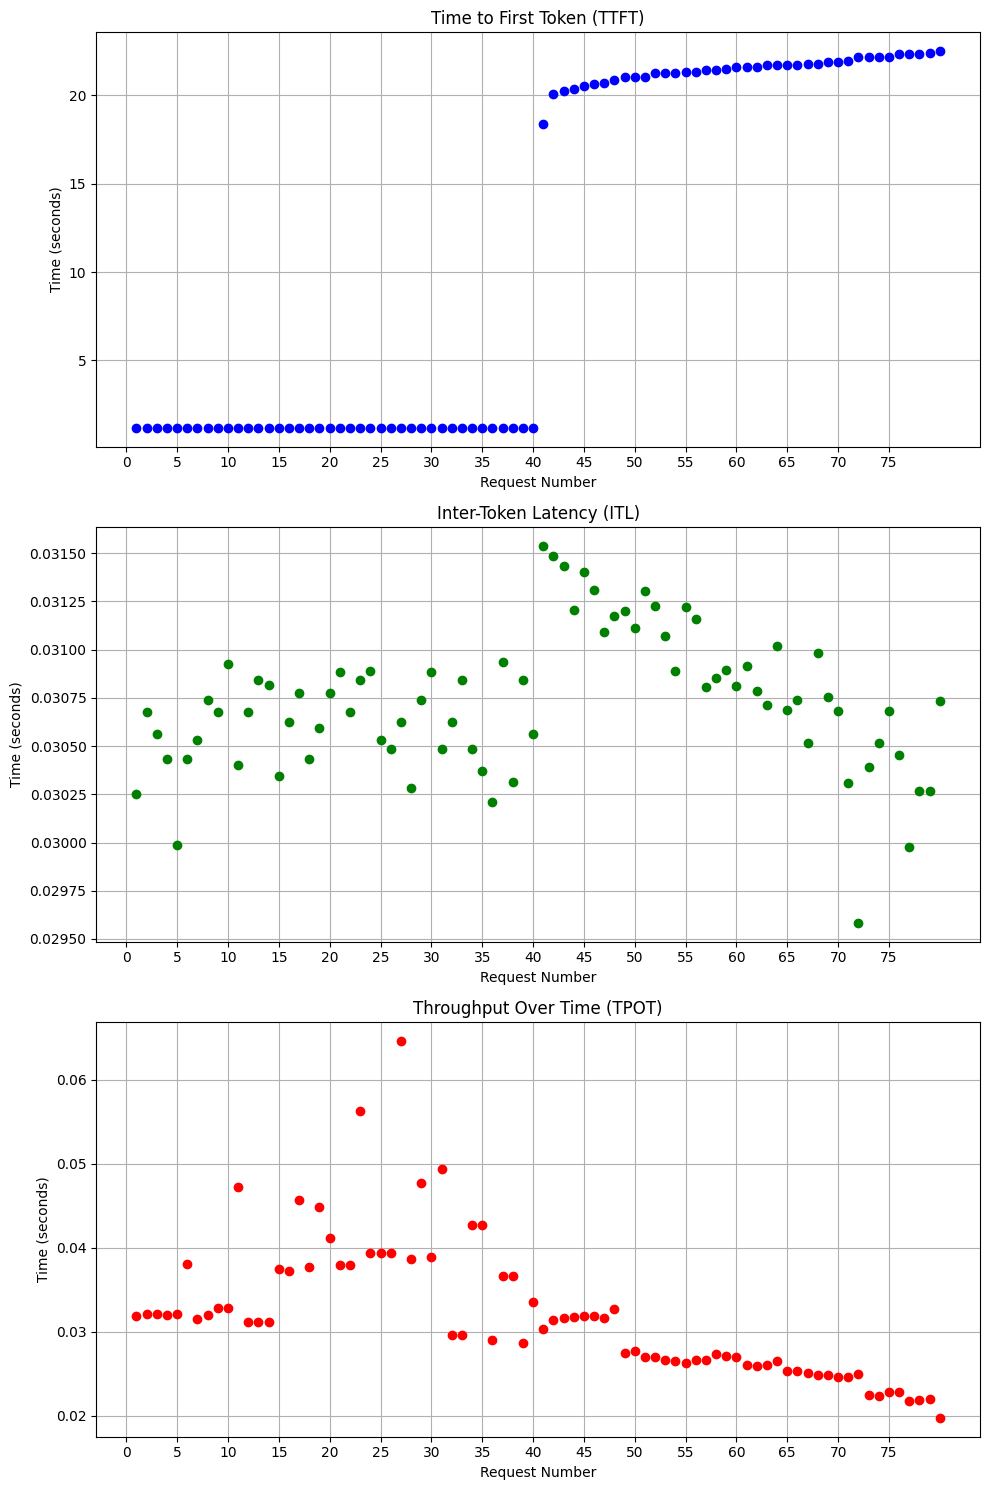

In [12]:
filename = "/home/hkngae/vllm/fypStats/local_NVlink/stat_80.txt"
num_requests = 80
mai(filename, num_requests)

Processing 81 requests from file: /home/hkngae/vllm/fypStats/local_NVlink/stat_160.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=1.794738s, max=31.482902s, avg=12.183187s
ITL:  min=0.029724s, max=0.031556s, avg=0.030657s
TPOT: min=0.028892s, max=0.060867s, avg=0.037368s
Plot saved as: /home/hkngae/vllm/fypStats/local_NVlink/stat_160_plot.png


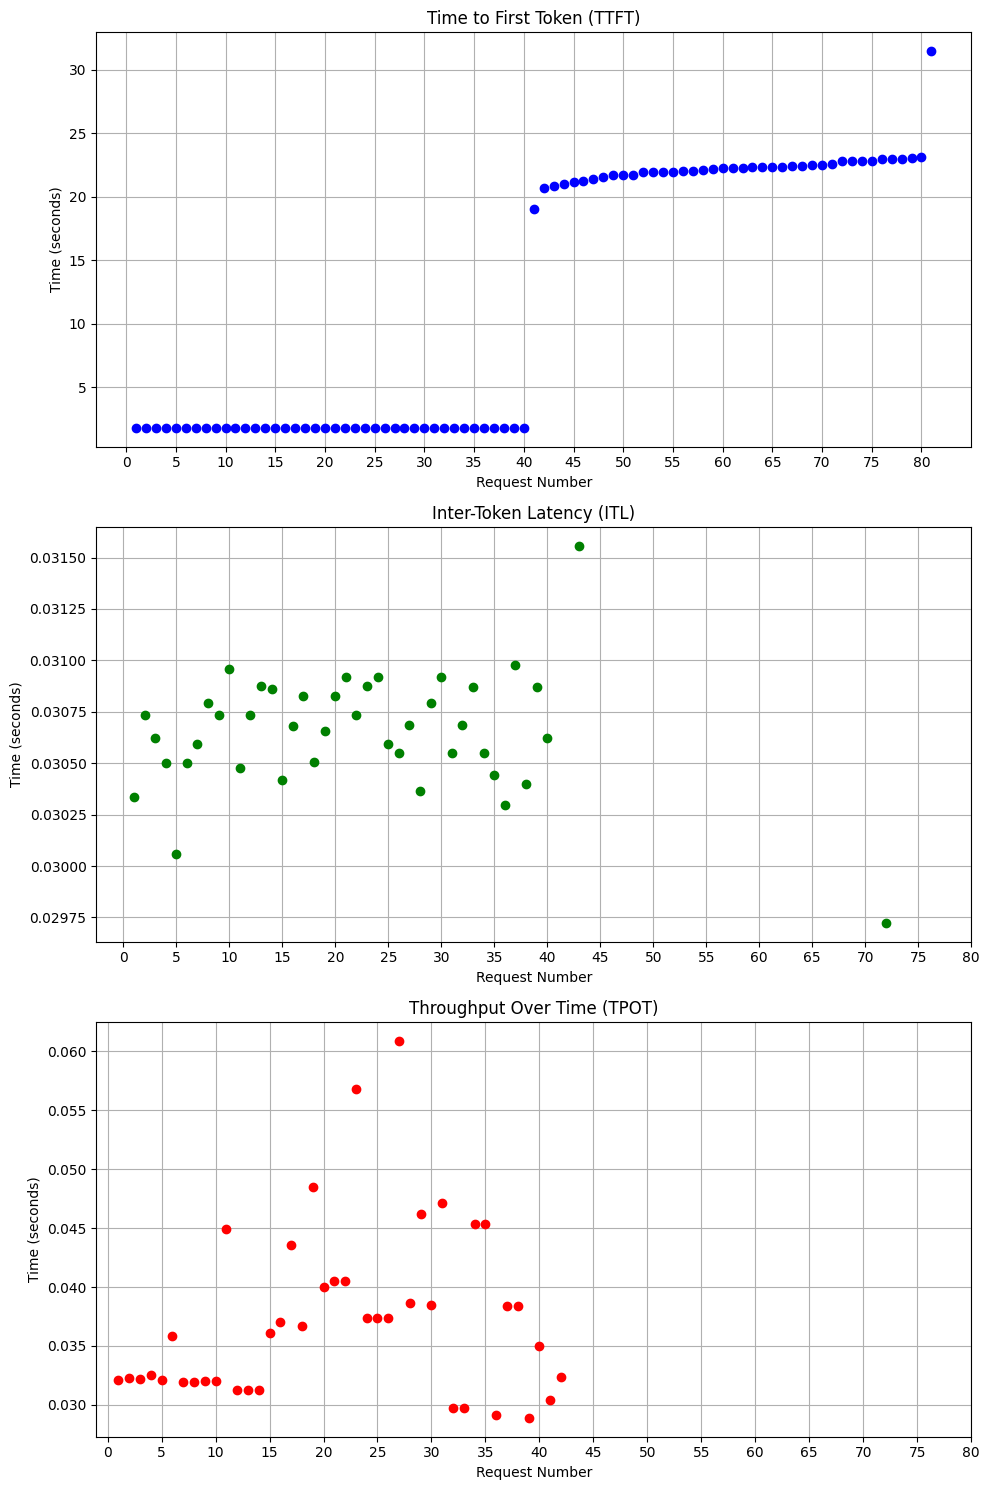

In [13]:
filename = "/home/hkngae/vllm/fypStats/local_NVlink/stat_160.txt"
num_requests = 160
mai(filename, num_requests)

Processing 20 requests from file: /home/hkngae/vllm/fypStats/local_1000MB/stat_20.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.506410s, max=0.521088s, avg=0.510798s
ITL:  min=0.024568s, max=0.024959s, avg=0.024919s
TPOT: min=0.019597s, max=0.039942s, avg=0.024744s
Plot saved as: /home/hkngae/vllm/fypStats/local_1000MB/stat_20_plot.png


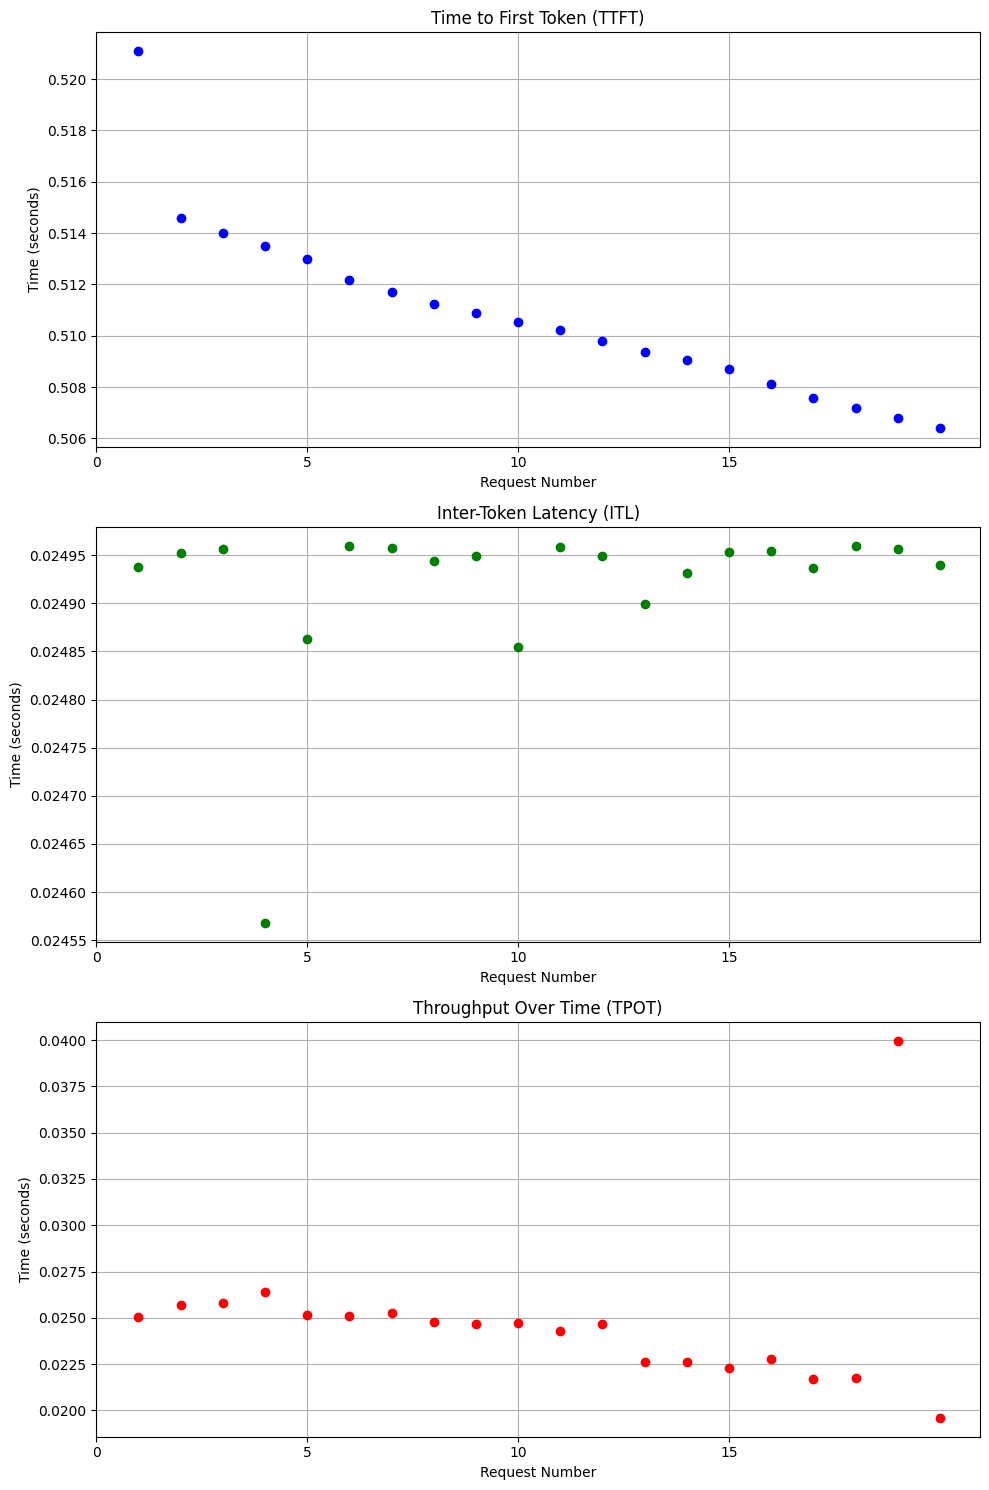

In [14]:
filename = "/home/hkngae/vllm/fypStats/local_1000MB/stat_20.txt"
num_requests = 20
mai(filename, num_requests)

Processing 40 requests from file: /home/hkngae/vllm/fypStats/local_1000MB/stat_40.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.756277s, max=0.771096s, avg=0.761229s
ITL:  min=0.029519s, max=0.029792s, avg=0.029693s
TPOT: min=0.019556s, max=0.039902s, avg=0.027071s
Plot saved as: /home/hkngae/vllm/fypStats/local_1000MB/stat_40_plot.png


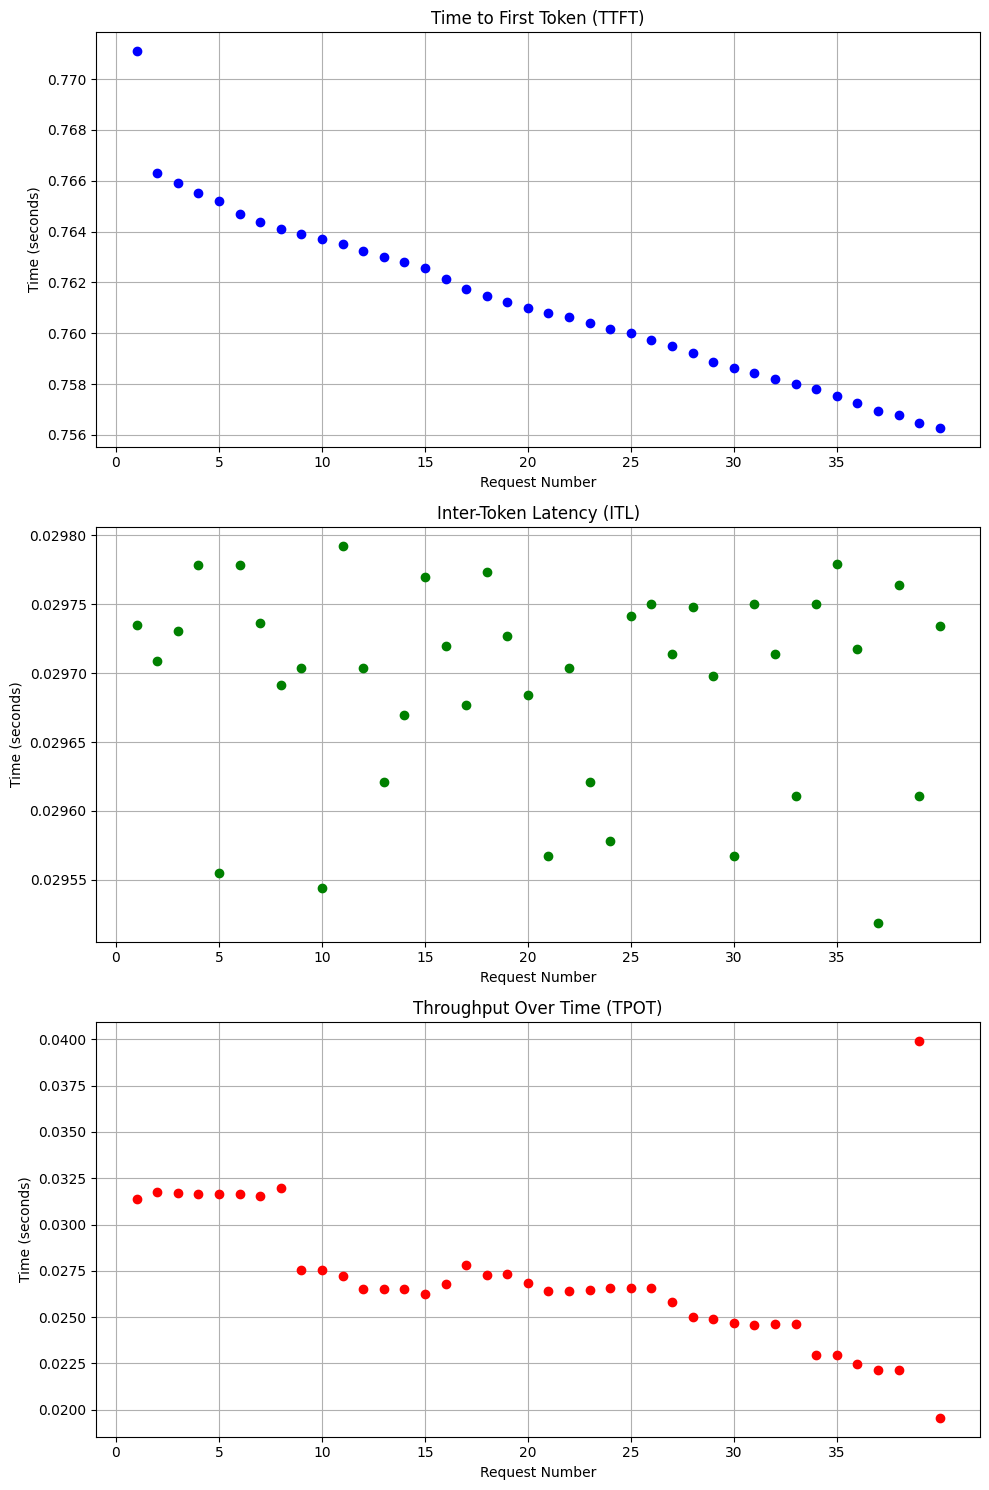

In [15]:
filename = "/home/hkngae/vllm/fypStats/local_1000MB/stat_40.txt"
num_requests = 40
mai(filename, num_requests)

Processing 80 requests from file: /home/hkngae/vllm/fypStats/local_1000MB/stat_80.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=1.427284s, max=22.481200s, avg=11.431000s
ITL:  min=0.029219s, max=0.031175s, avg=0.030345s
TPOT: min=0.019660s, max=0.061421s, avg=0.031660s
Plot saved as: /home/hkngae/vllm/fypStats/local_1000MB/stat_80_plot.png


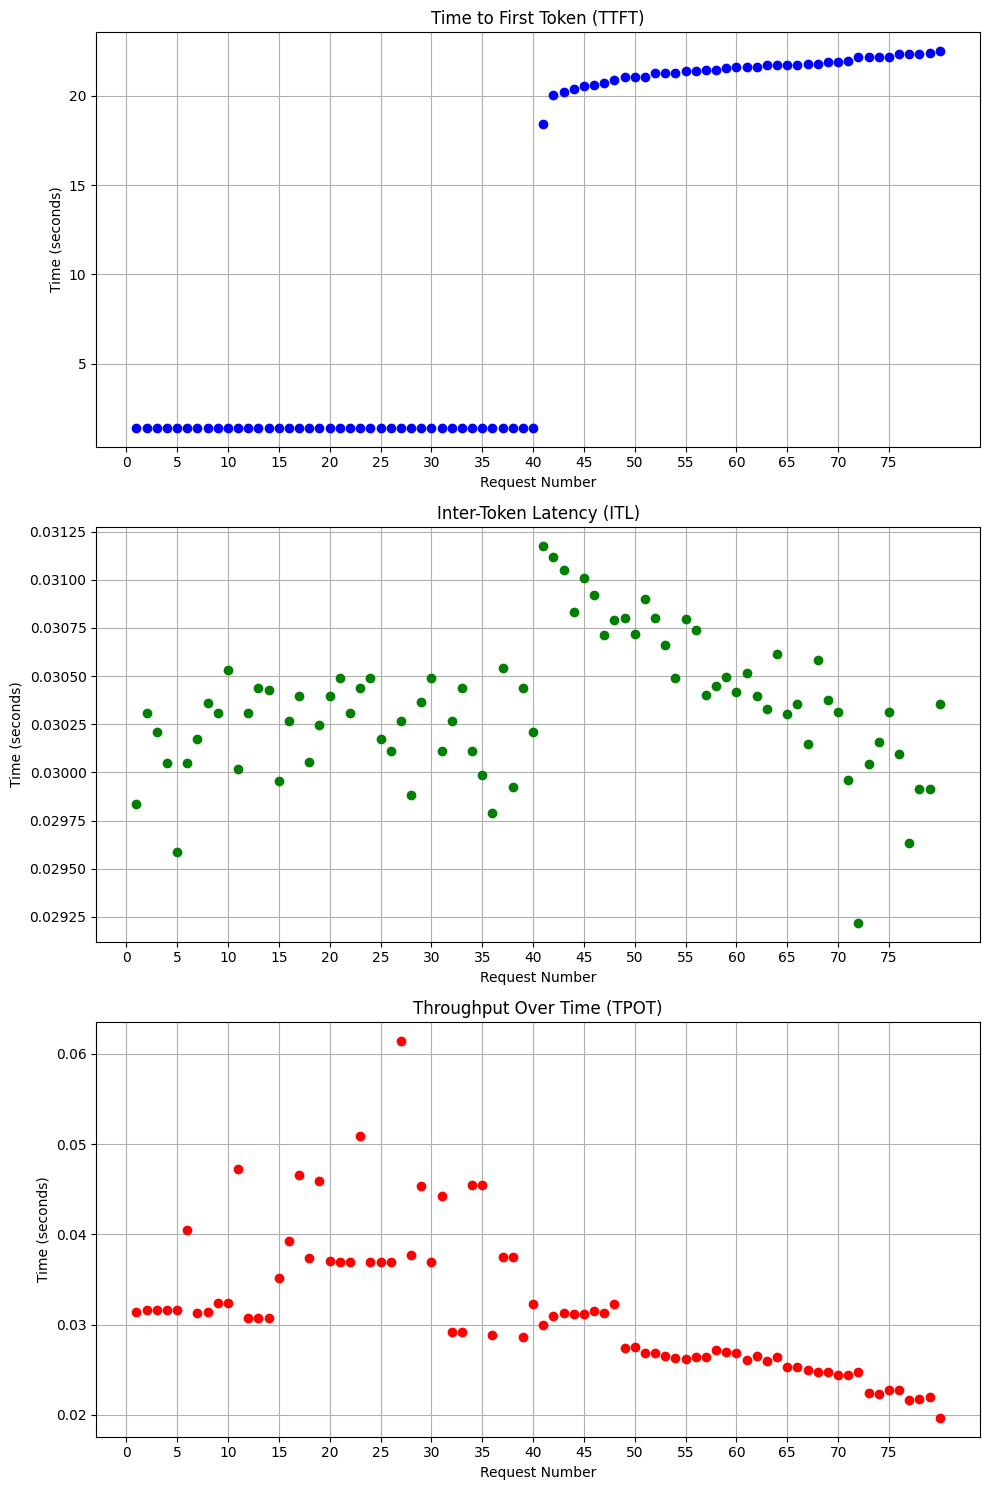

In [16]:
filename = "/home/hkngae/vllm/fypStats/local_1000MB/stat_80.txt"
num_requests = 80
mai(filename, num_requests)

Processing 160 requests from file: /home/hkngae/vllm/fypStats/local_1000MB/stat_160.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=1.920025s, max=65.049814s, avg=32.051376s
ITL:  min=0.029014s, max=0.031645s, avg=0.030706s
TPOT: min=0.019561s, max=0.060935s, avg=0.032893s
Plot saved as: /home/hkngae/vllm/fypStats/local_1000MB/stat_160_plot.png


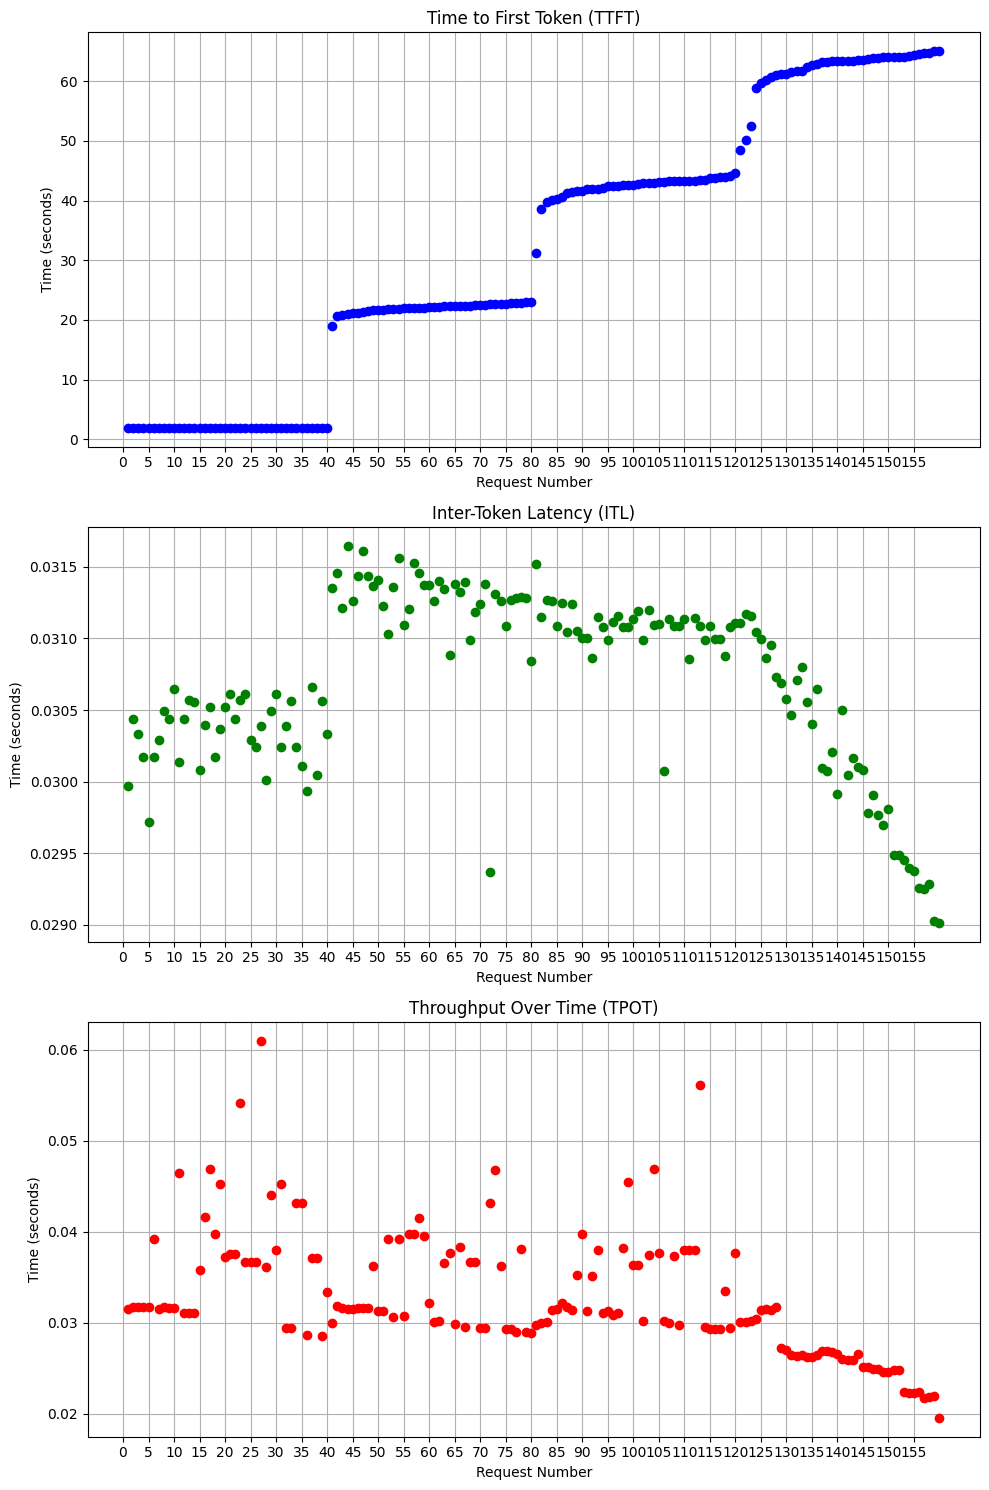

In [17]:
filename = "/home/hkngae/vllm/fypStats/local_1000MB/stat_160.txt"
num_requests = 160
mai(filename, num_requests)

Processing 20 requests from file: /home/hkngae/vllm/fypStats/local_SHM/stat_20.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.476779s, max=0.486503s, avg=0.479653s
ITL:  min=0.024769s, max=0.025167s, avg=0.025125s
TPOT: min=0.019689s, max=0.040254s, avg=0.024901s
Plot saved as: /home/hkngae/vllm/fypStats/local_SHM/stat_20_plot.png


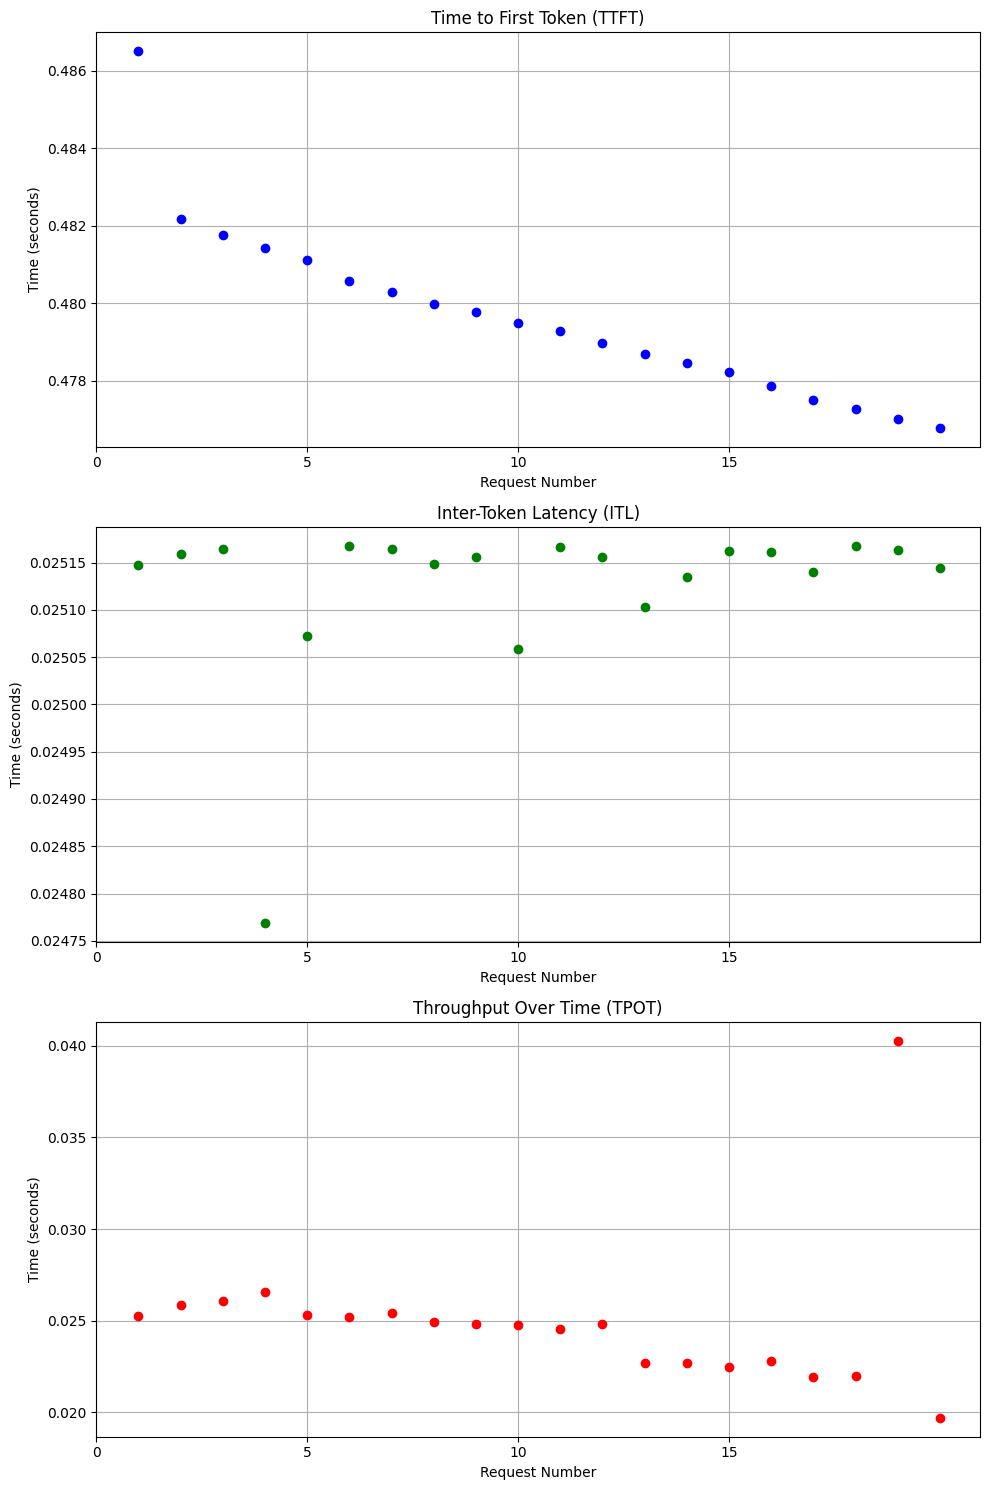

In [18]:
filename = "/home/hkngae/vllm/fypStats/local_SHM/stat_20.txt"
num_requests = 20
mai(filename, num_requests)

Processing 40 requests from file: /home/hkngae/vllm/fypStats/local_SHM/stat_40.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.971854s, max=0.986387s, avg=0.976635s
ITL:  min=0.029957s, max=0.030254s, avg=0.030146s
TPOT: min=0.019579s, max=0.039963s, avg=0.027202s


Plot saved as: /home/hkngae/vllm/fypStats/local_SHM/stat_40_plot.png


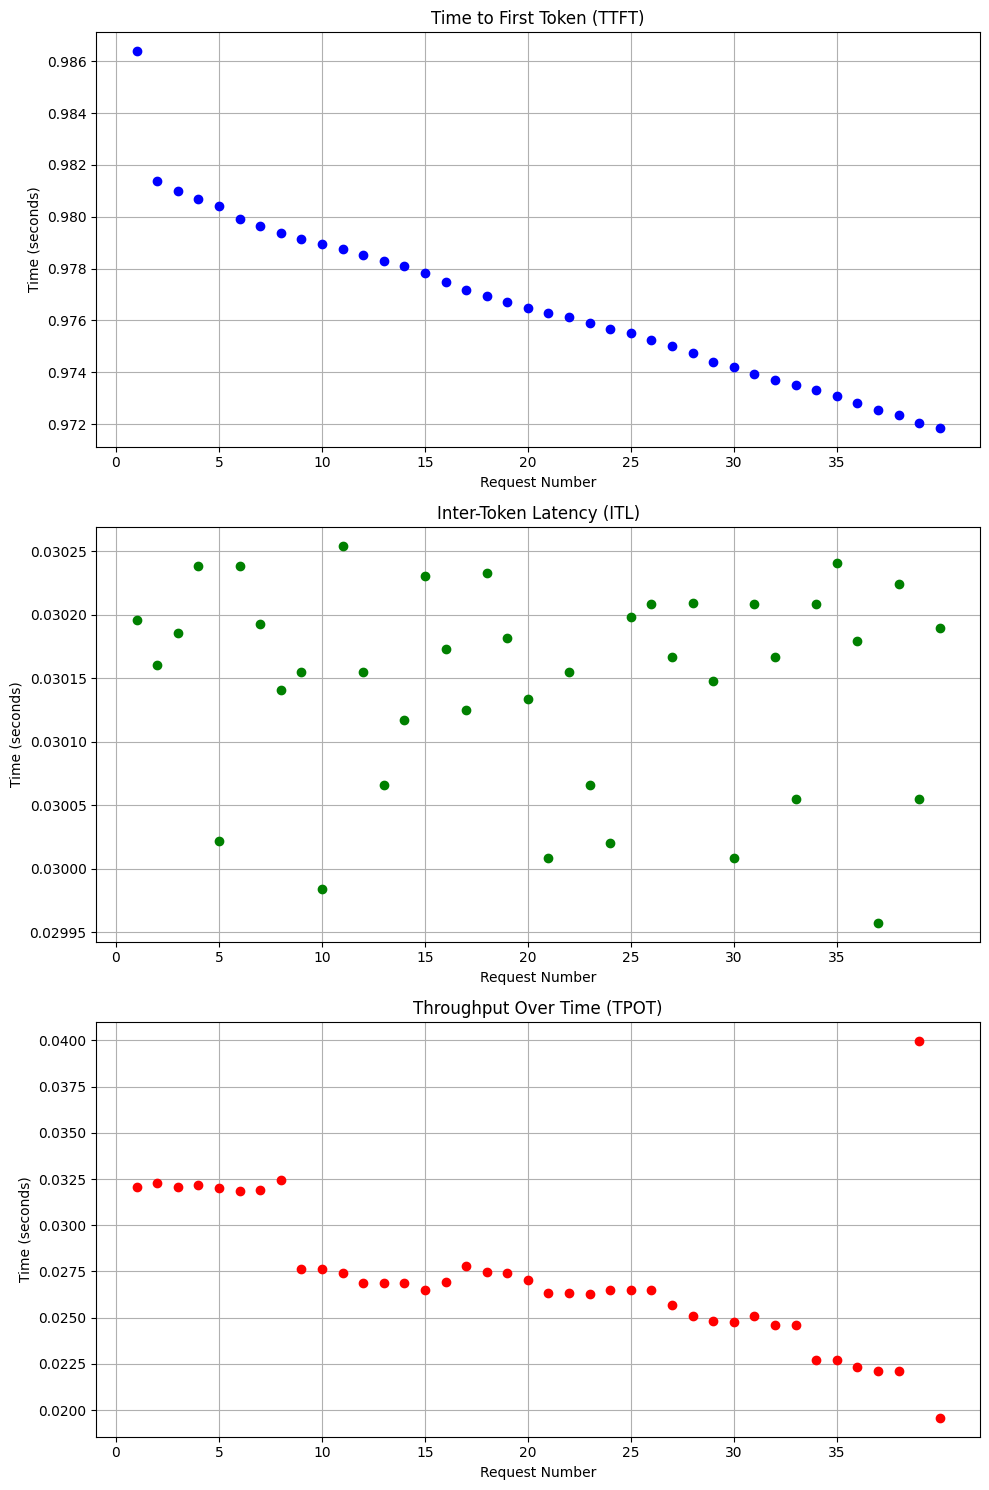

In [19]:
filename = "/home/hkngae/vllm/fypStats/local_SHM/stat_40.txt"
num_requests = 40
mai(filename, num_requests)

Processing 80 requests from file: /home/hkngae/vllm/fypStats/local_SHM/stat_80.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.503295s, max=21.904319s, avg=10.648713s
ITL:  min=0.029766s, max=0.031792s, avg=0.030860s
TPOT: min=0.019740s, max=0.071570s, avg=0.033148s
Plot saved as: /home/hkngae/vllm/fypStats/local_SHM/stat_80_plot.png


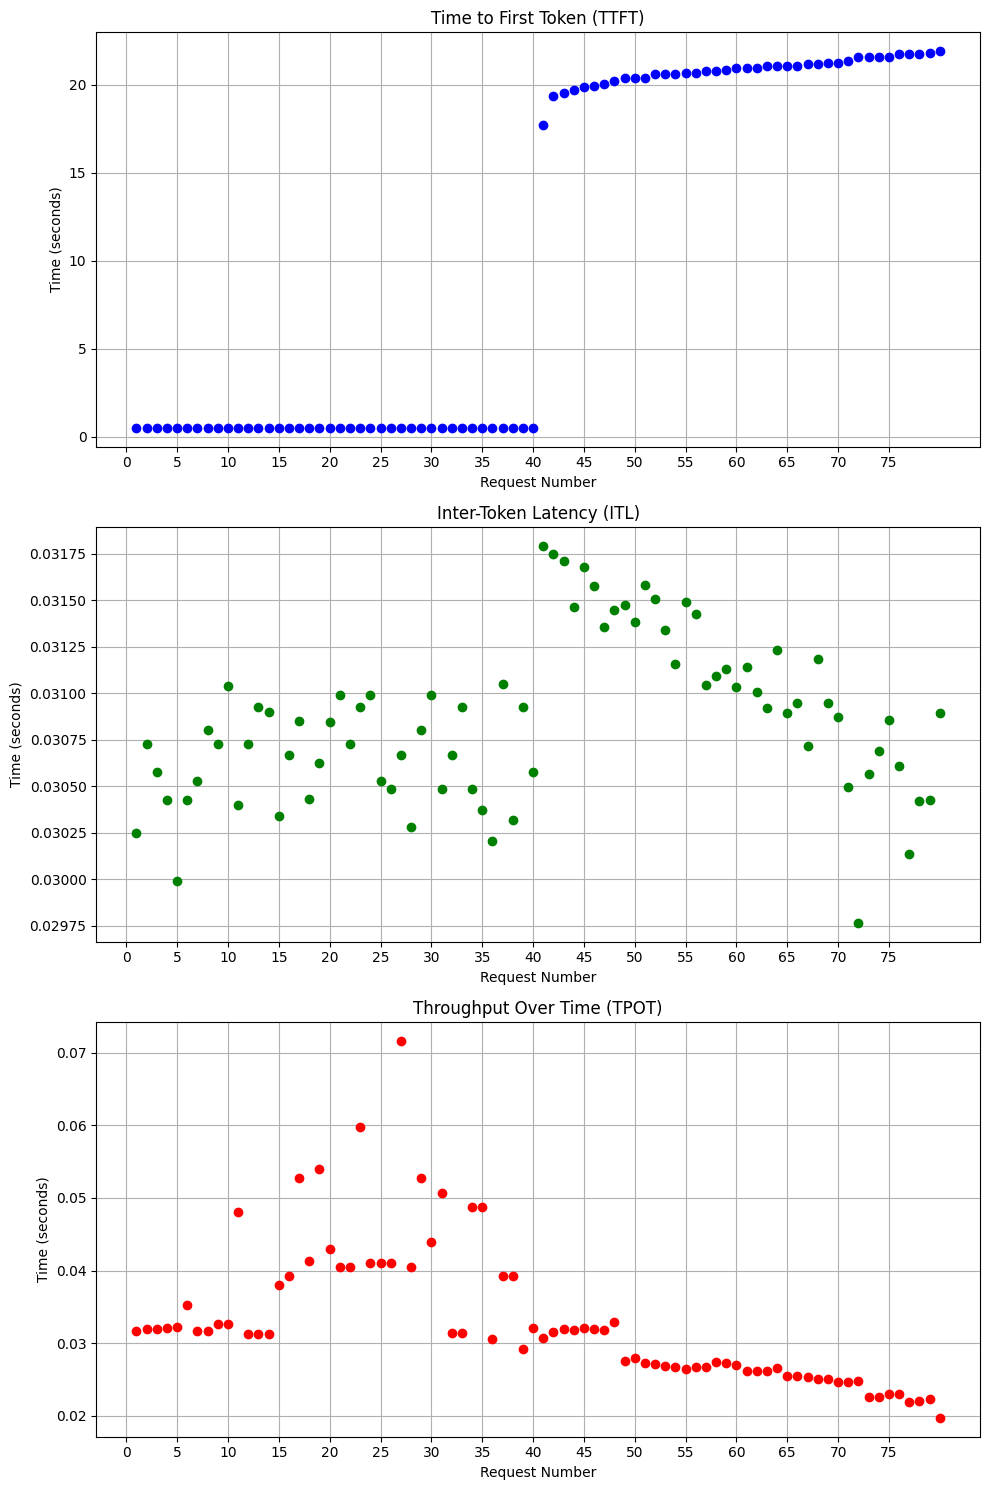

In [20]:
filename = "/home/hkngae/vllm/fypStats/local_SHM/stat_80.txt"
num_requests = 80
mai(filename, num_requests)

Processing 81 requests from file: /home/hkngae/vllm/fypStats/local_SHM/stat_160.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=1.698845s, max=31.426058s, avg=12.126317s
ITL:  min=0.029646s, max=0.031456s, avg=0.030766s
TPOT: min=0.028546s, max=0.058563s, avg=0.036586s
Plot saved as: /home/hkngae/vllm/fypStats/local_SHM/stat_160_plot.png


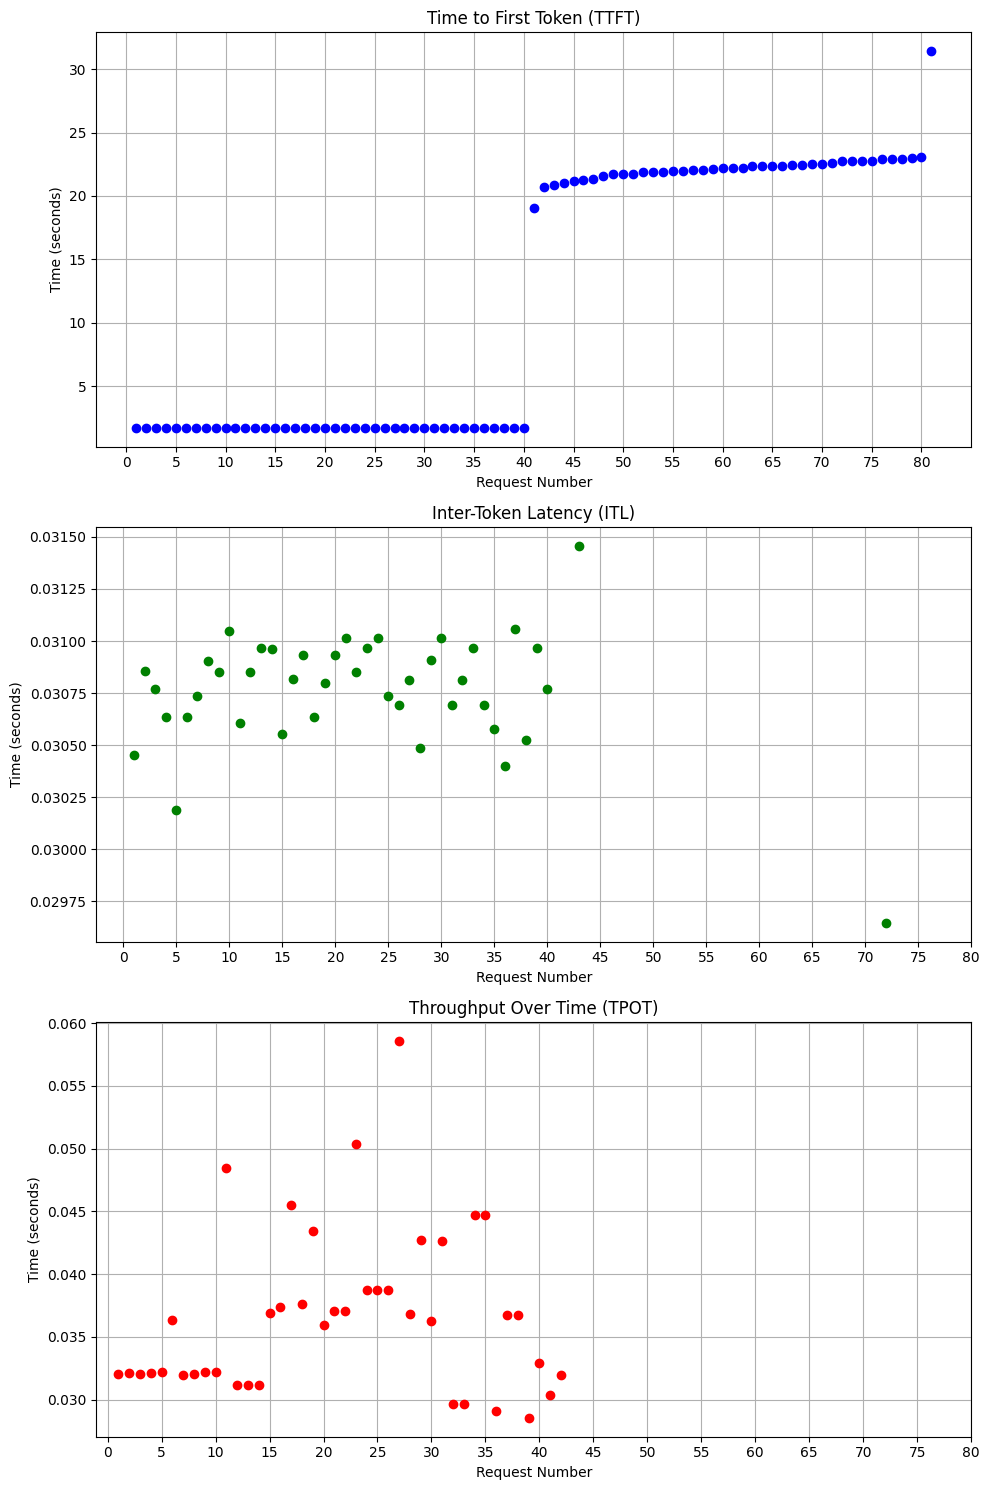

In [21]:
filename = "/home/hkngae/vllm/fypStats/local_SHM/stat_160.txt"
num_requests = 160
mai(filename, num_requests)

Processing 20 requests from file: /home/hkngae/vllm/fypStats/remote_8MB/stat_20.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=12.808444s, max=12.822857s, avg=12.812774s
ITL:  min=0.024603s, max=0.025015s, avg=0.024974s
TPOT: min=0.019580s, max=0.040017s, avg=0.024776s
Plot saved as: /home/hkngae/vllm/fypStats/remote_8MB/stat_20_plot.png


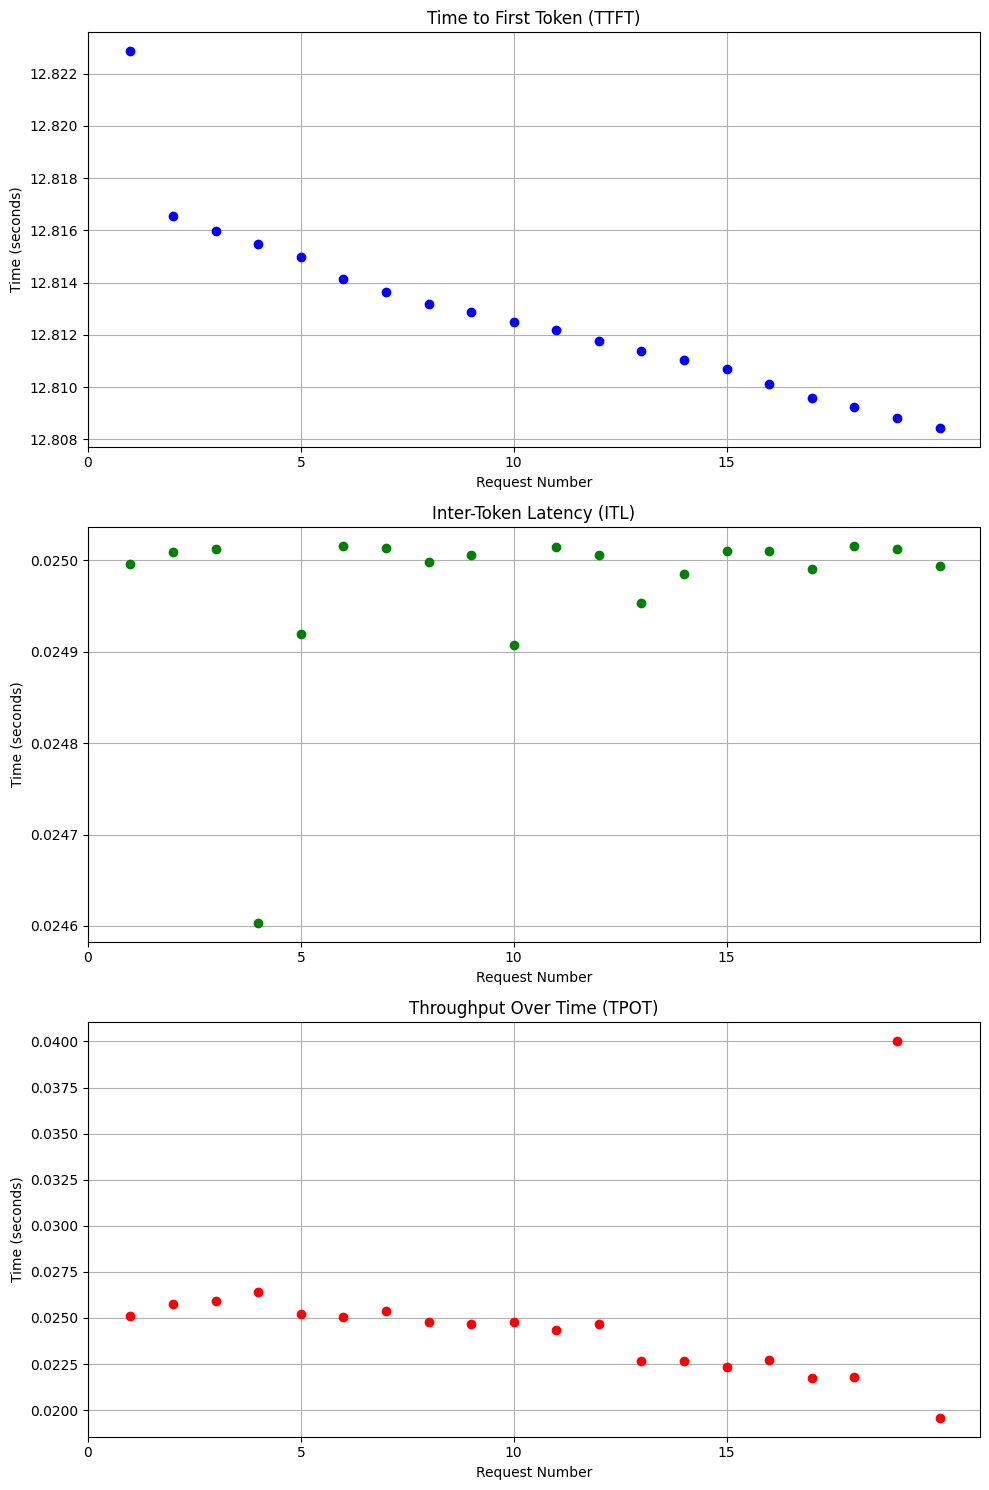

In [22]:
filename = "/home/hkngae/vllm/fypStats/remote_8MB/stat_20.txt"
num_requests = 20
mai(filename, num_requests)

Processing 40 requests from file: /home/hkngae/vllm/fypStats/remote_8MB/stat_40.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=231.250829s, max=231.266973s, avg=231.255962s
ITL:  min=0.029836s, max=0.030121s, avg=0.030017s
TPOT: min=0.019592s, max=0.040000s, avg=0.027264s


Plot saved as: /home/hkngae/vllm/fypStats/remote_8MB/stat_40_plot.png


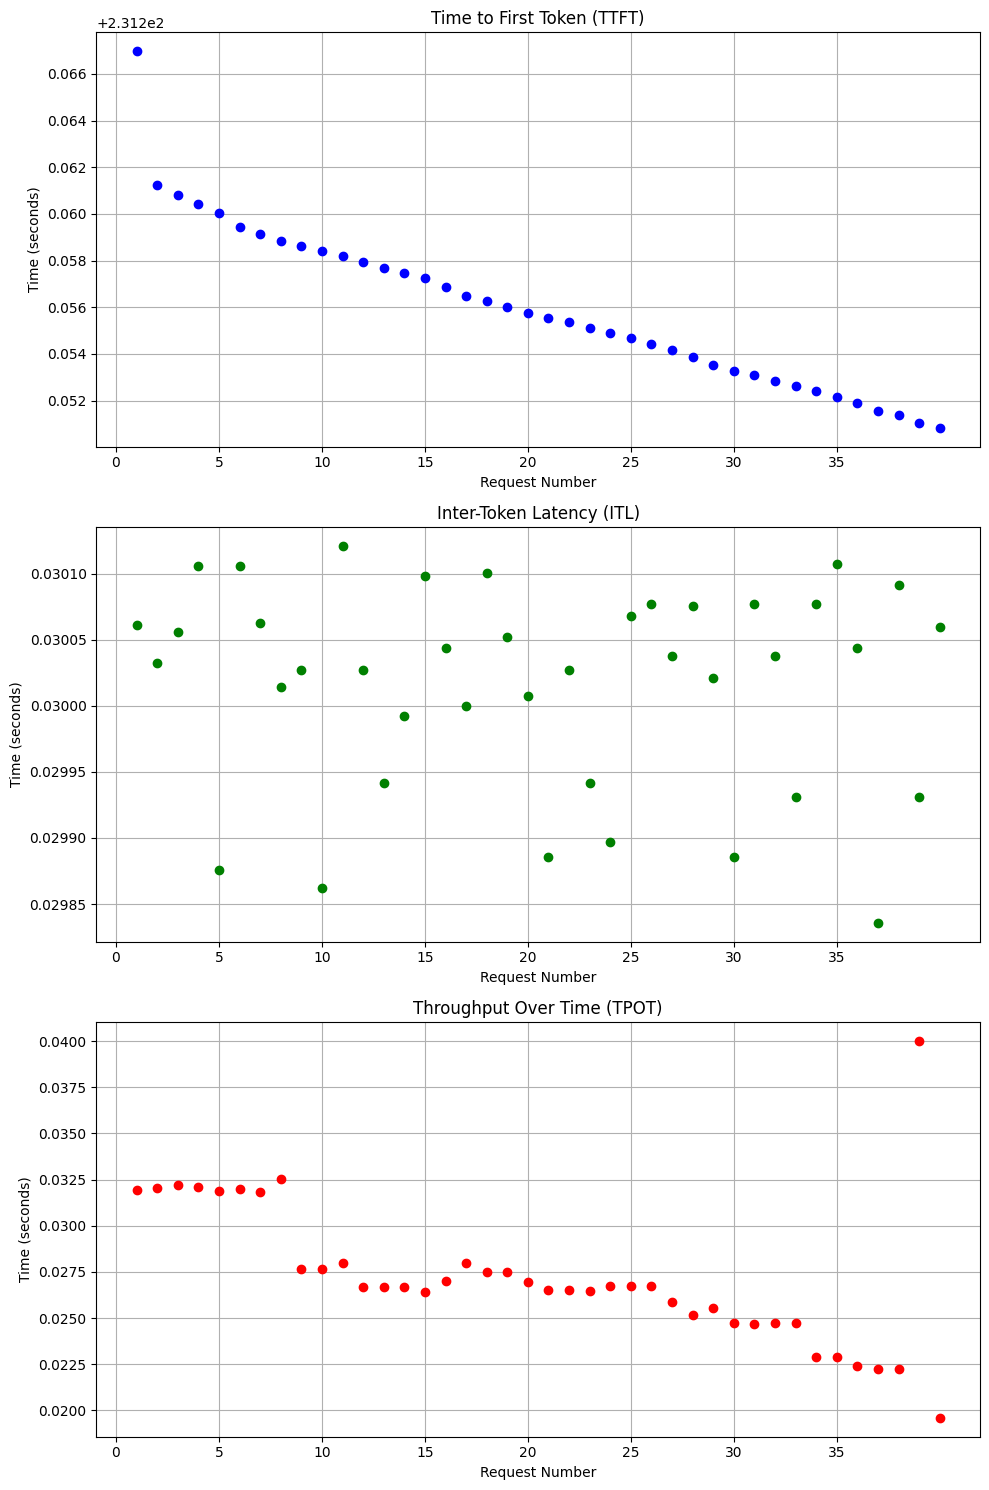

In [23]:
filename = "/home/hkngae/vllm/fypStats/remote_8MB/stat_40.txt"
num_requests = 40
mai(filename, num_requests)

Processing 80 requests from file: /home/hkngae/vllm/fypStats/remote_8MB/stat_80.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=231.037810s, max=515.962103s, avg=313.674339s
ITL:  min=0.029851s, max=0.444127s, avg=0.219105s
TPOT: min=0.019695s, max=29.147040s, avg=1.798732s
Plot saved as: /home/hkngae/vllm/fypStats/remote_8MB/stat_80_plot.png


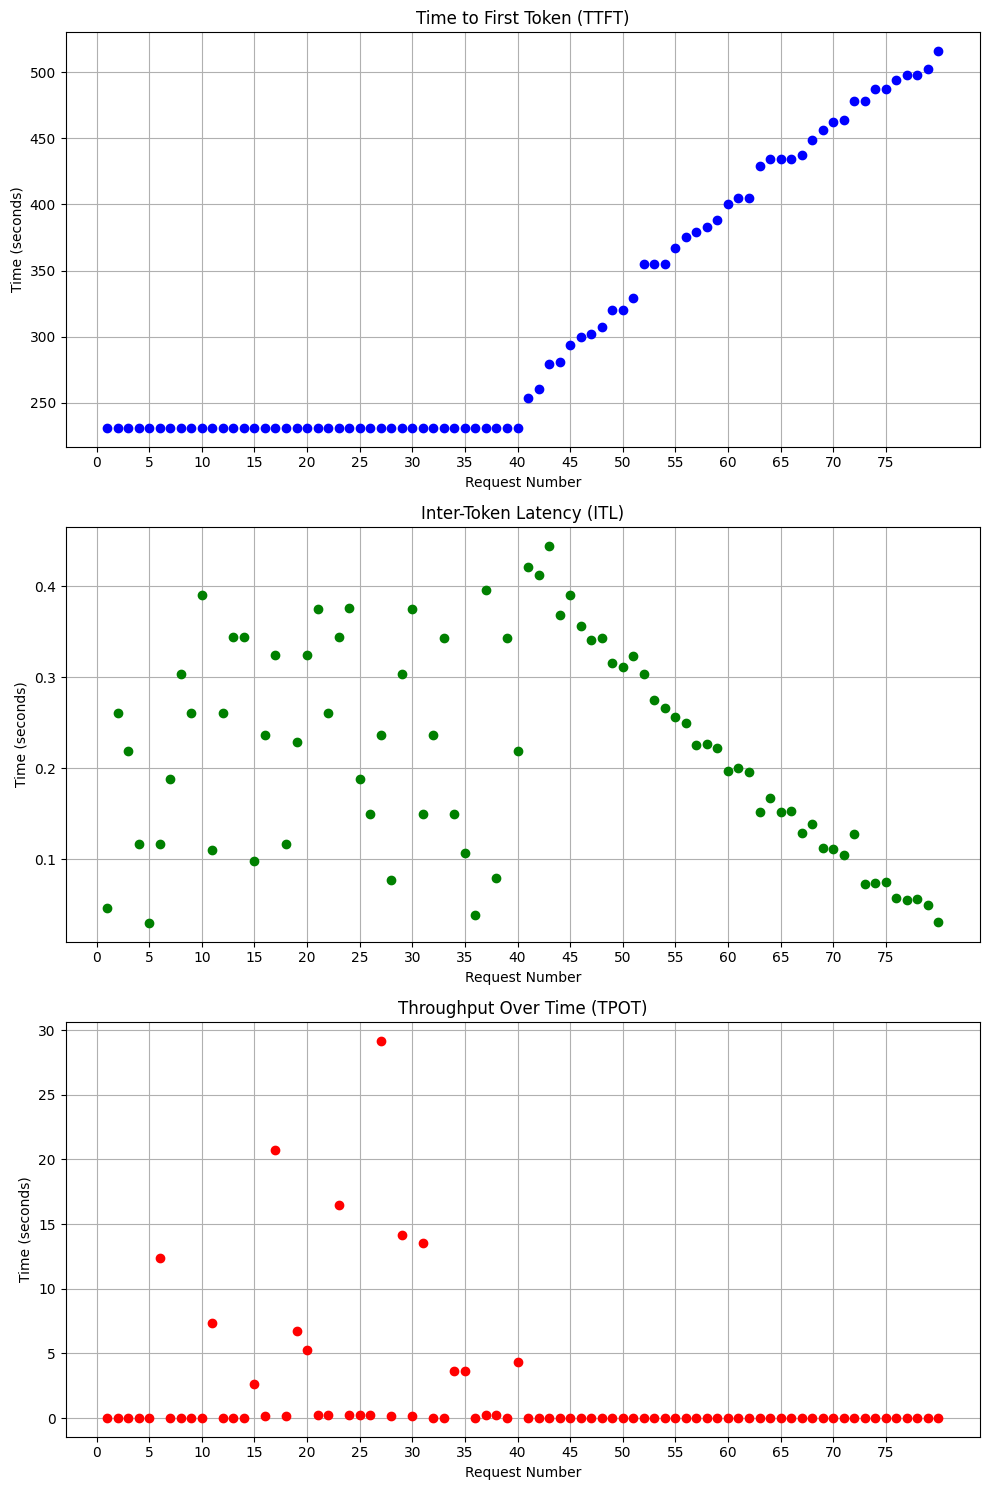

In [24]:
filename = "/home/hkngae/vllm/fypStats/remote_8MB/stat_80.txt"
num_requests = 80
mai(filename, num_requests)

Processing 160 requests from file: /home/hkngae/vllm/fypStats/remote_8MB/stat_160.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=231.313642s, max=1003.956802s, avg=550.716857s
ITL:  min=0.028846s, max=0.594636s, avg=0.292080s
TPOT: min=0.019354s, max=29.199512s, avg=1.685062s
Plot saved as: /home/hkngae/vllm/fypStats/remote_8MB/stat_160_plot.png


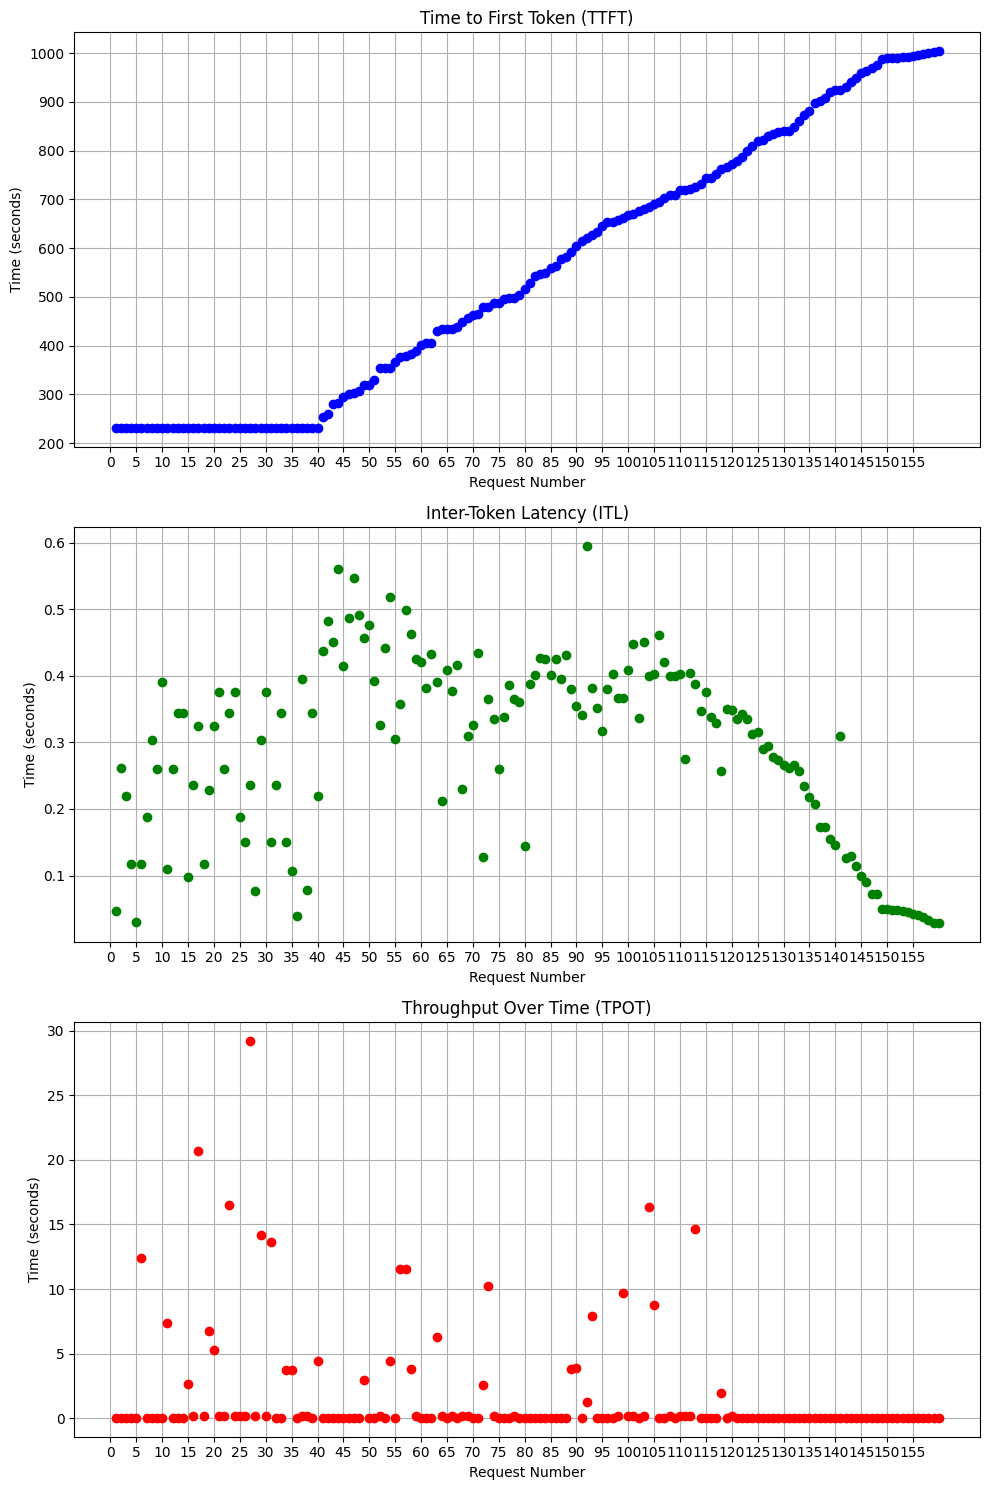

In [25]:
filename = "/home/hkngae/vllm/fypStats/remote_8MB/stat_160.txt"
num_requests = 160
mai(filename, num_requests)

Processing 20 requests from file: /home/hkngae/vllm/fypStats/remote_80MB/stat_20.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=12.779315s, max=12.796386s, avg=12.783840s
ITL:  min=0.024654s, max=0.025096s, avg=0.025054s
TPOT: min=0.019628s, max=0.039973s, avg=0.024862s
Plot saved as: /home/hkngae/vllm/fypStats/remote_80MB/stat_20_plot.png


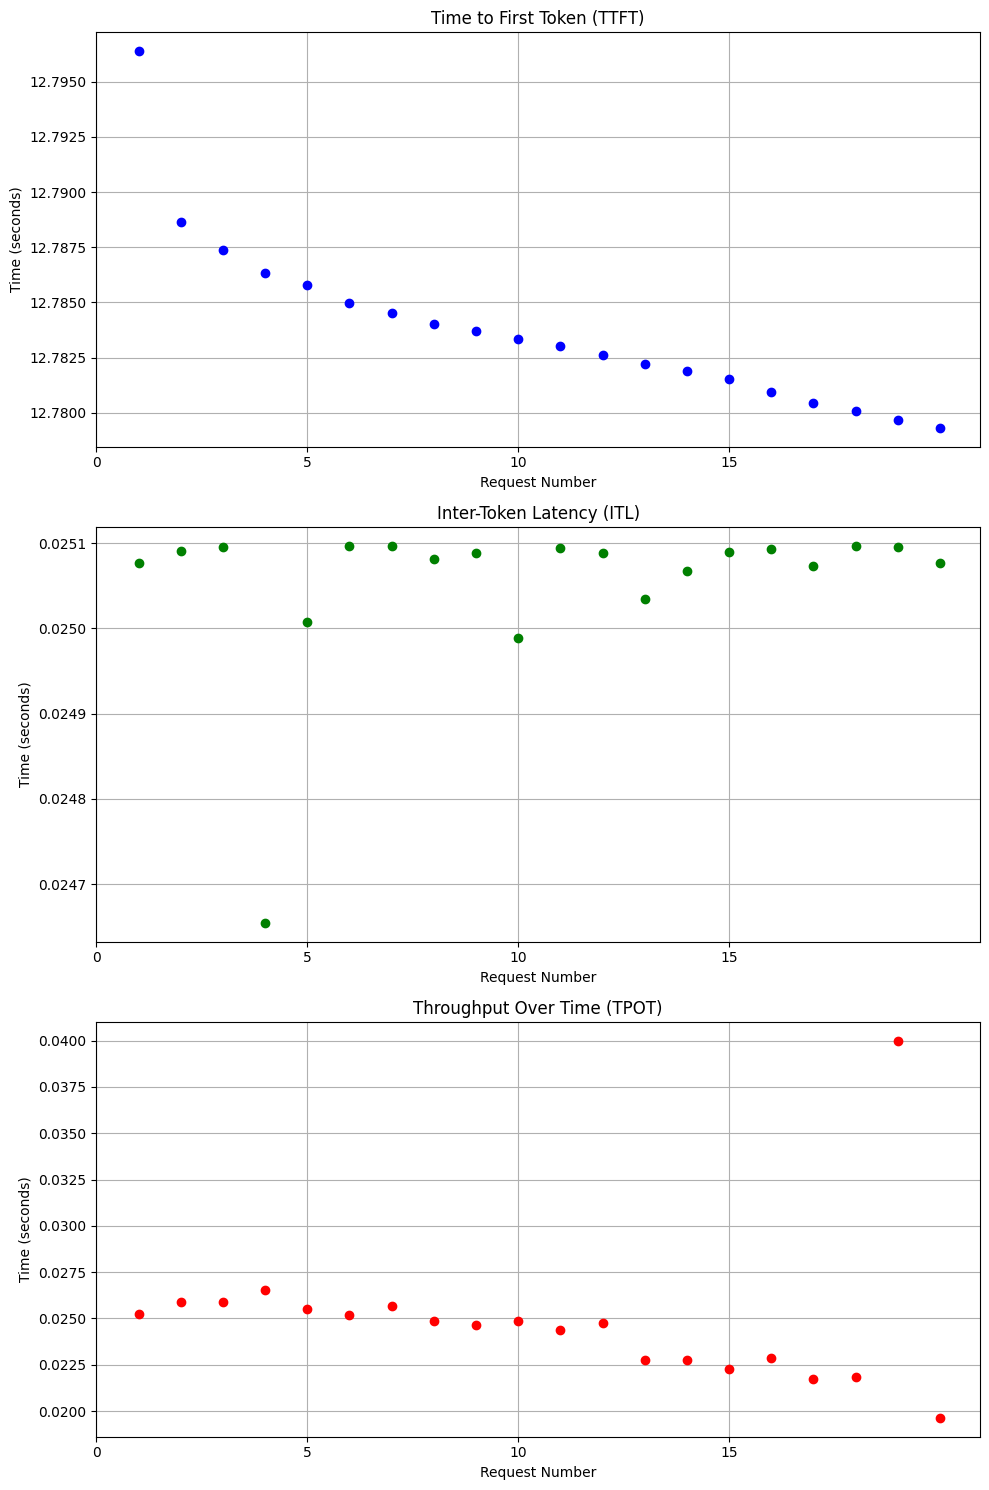

In [26]:
filename = "/home/hkngae/vllm/fypStats/remote_80MB/stat_20.txt"
num_requests = 20
mai(filename, num_requests)

Processing 40 requests from file: /home/hkngae/vllm/fypStats/remote_80MB/stat_40.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=23.388823s, max=23.404157s, avg=23.393649s
ITL:  min=0.029695s, max=0.029976s, avg=0.029875s
TPOT: min=0.019547s, max=0.040009s, avg=0.027155s
Plot saved as: /home/hkngae/vllm/fypStats/remote_80MB/stat_40_plot.png


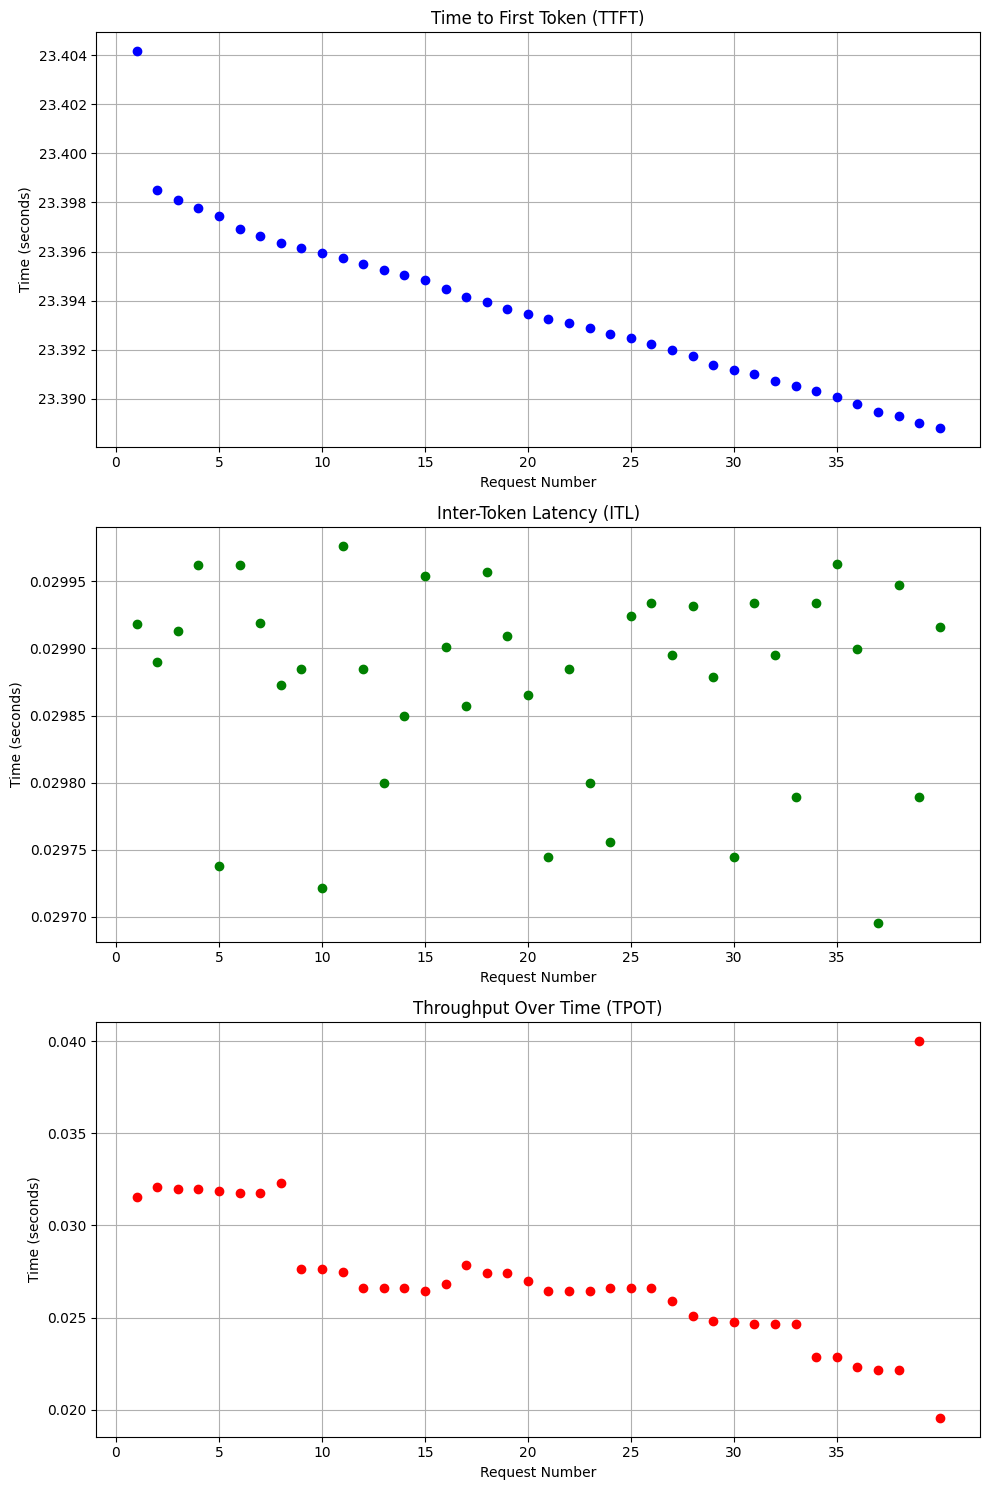

In [27]:
filename = "/home/hkngae/vllm/fypStats/remote_80MB/stat_40.txt"
num_requests = 40
mai(filename, num_requests)

Processing 80 requests from file: /home/hkngae/vllm/fypStats/remote_80MB/stat_80.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=23.692582s, max=70.948097s, avg=40.949840s
ITL:  min=0.029766s, max=0.072047s, avg=0.049165s
TPOT: min=0.019720s, max=2.843438s, avg=0.213942s


Plot saved as: /home/hkngae/vllm/fypStats/remote_80MB/stat_80_plot.png


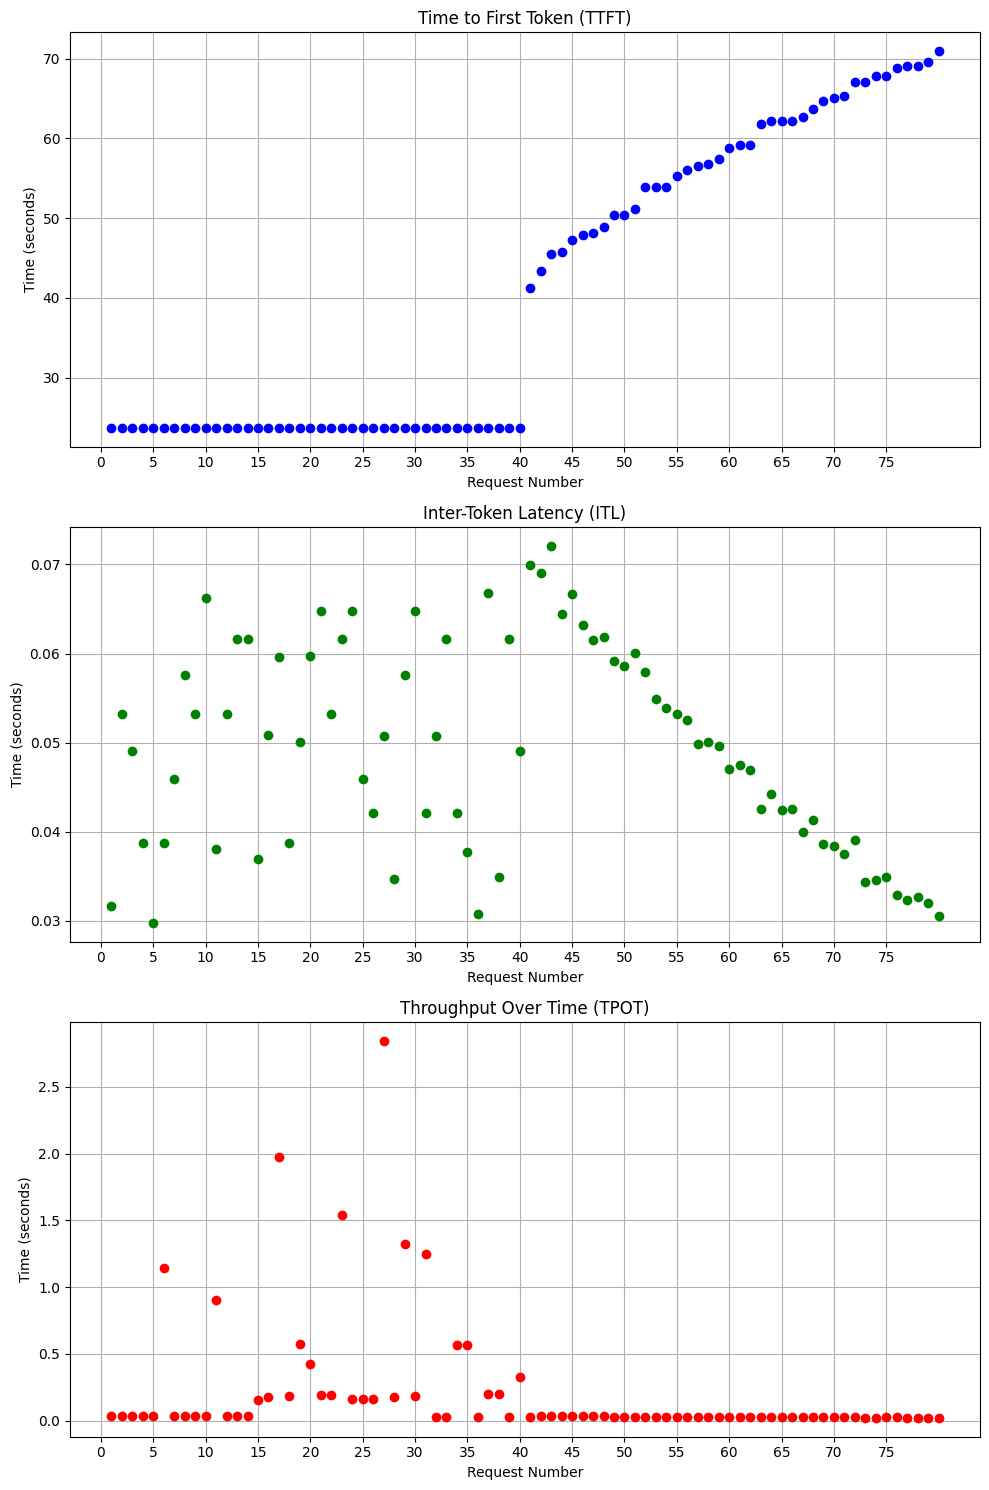

In [28]:
filename = "/home/hkngae/vllm/fypStats/remote_80MB/stat_80.txt"
num_requests = 80
mai(filename, num_requests)

Processing 160 requests from file: /home/hkngae/vllm/fypStats/remote_80MB/stat_160.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=23.669142s, max=157.074072s, avg=82.491524s
ITL:  min=0.028916s, max=0.086505s, avg=0.056567s
TPOT: min=0.019463s, max=2.844099s, avg=0.201208s
Plot saved as: /home/hkngae/vllm/fypStats/remote_80MB/stat_160_plot.png


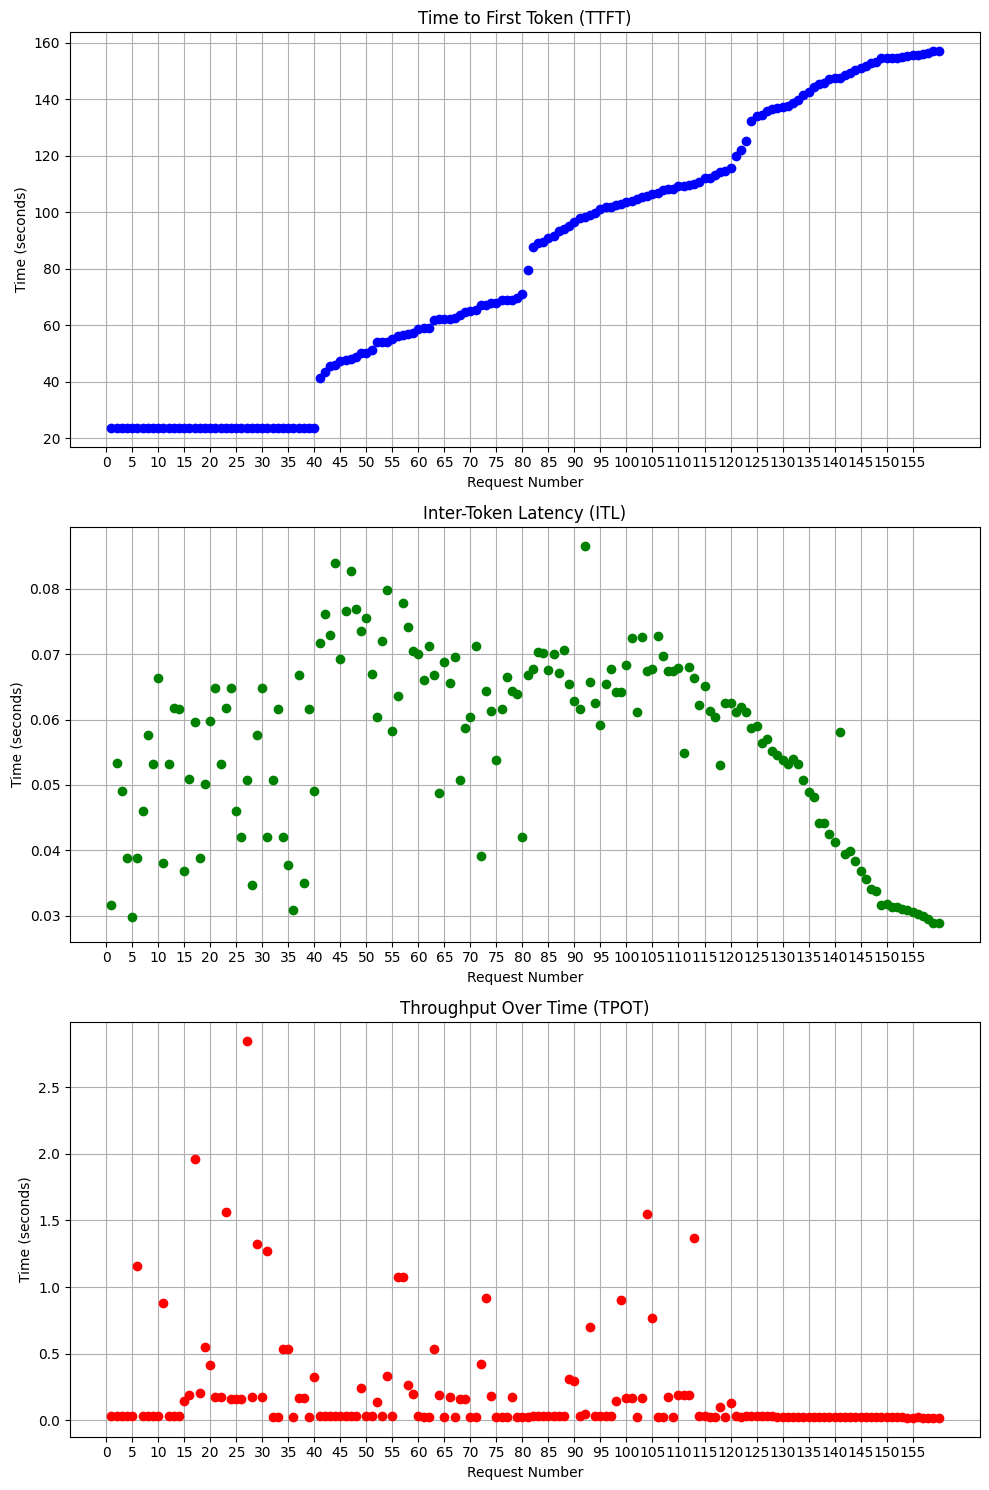

In [29]:
filename = "/home/hkngae/vllm/fypStats/remote_80MB/stat_160.txt"
num_requests = 160
mai(filename, num_requests)

Processing 20 requests from file: /home/hkngae/vllm/fypStats/remote_800MB/stat_20.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=1.415864s, max=1.426608s, avg=1.418683s
ITL:  min=0.024765s, max=0.025119s, avg=0.025080s
TPOT: min=0.019540s, max=0.040076s, avg=0.024829s
Plot saved as: /home/hkngae/vllm/fypStats/remote_800MB/stat_20_plot.png


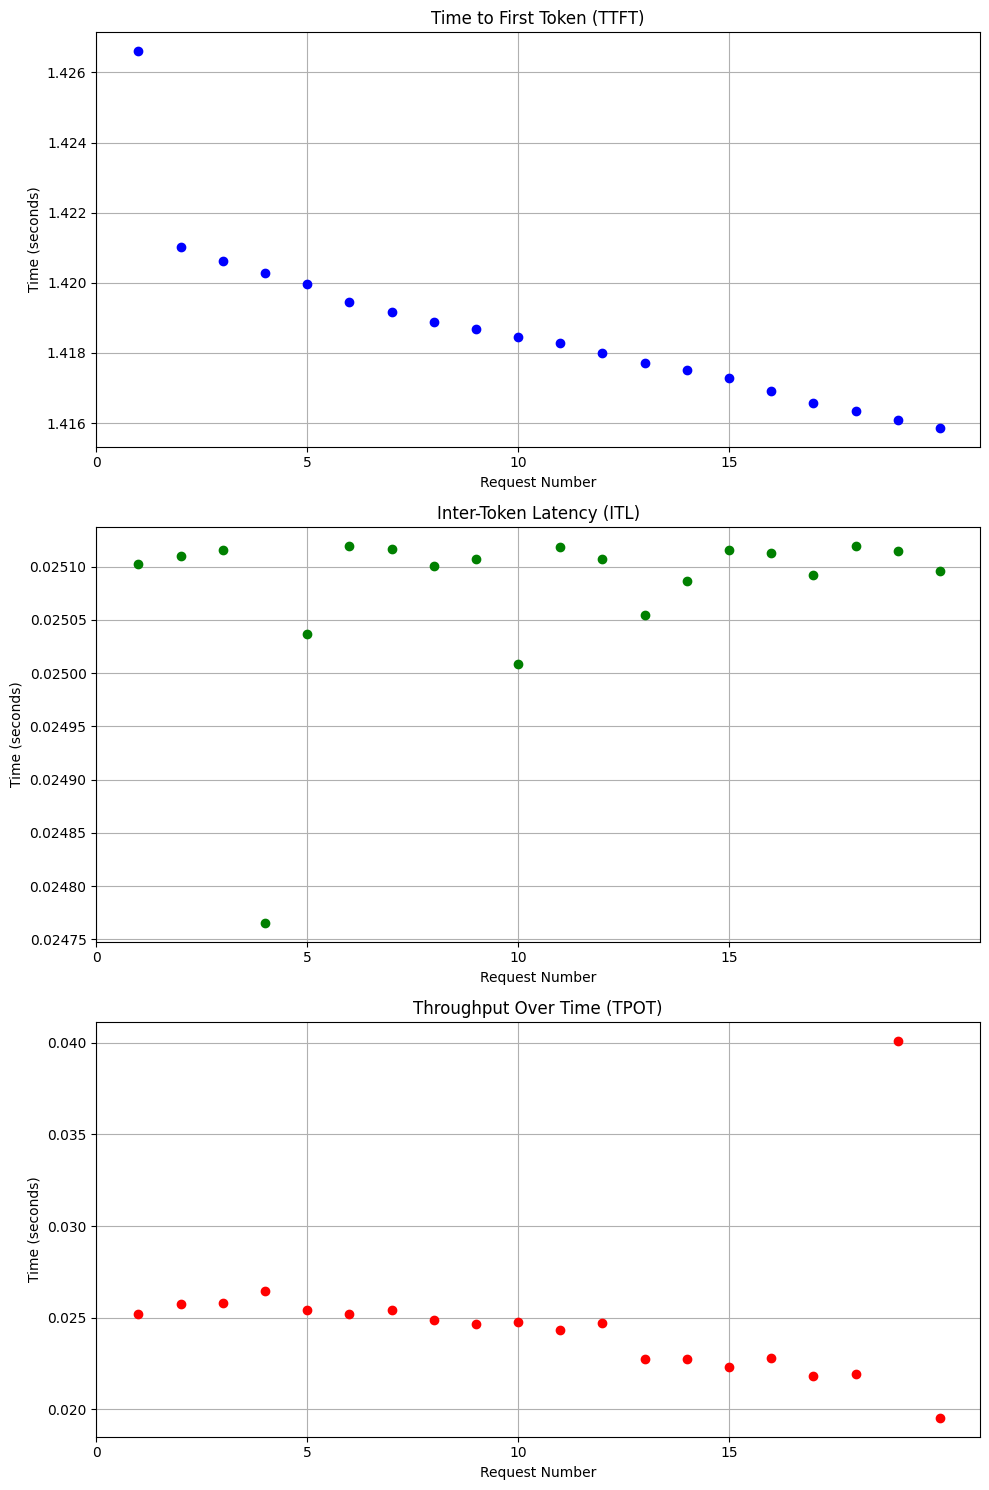

In [30]:
filename = "/home/hkngae/vllm/fypStats/remote_800MB/stat_20.txt"
num_requests = 20
mai(filename, num_requests)

Processing 40 requests from file: /home/hkngae/vllm/fypStats/remote_800MB/stat_40.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=2.959123s, max=2.974297s, avg=2.964392s
ITL:  min=0.029575s, max=0.029850s, avg=0.029751s
TPOT: min=0.019511s, max=0.039912s, avg=0.027138s
Plot saved as: /home/hkngae/vllm/fypStats/remote_800MB/stat_40_plot.png


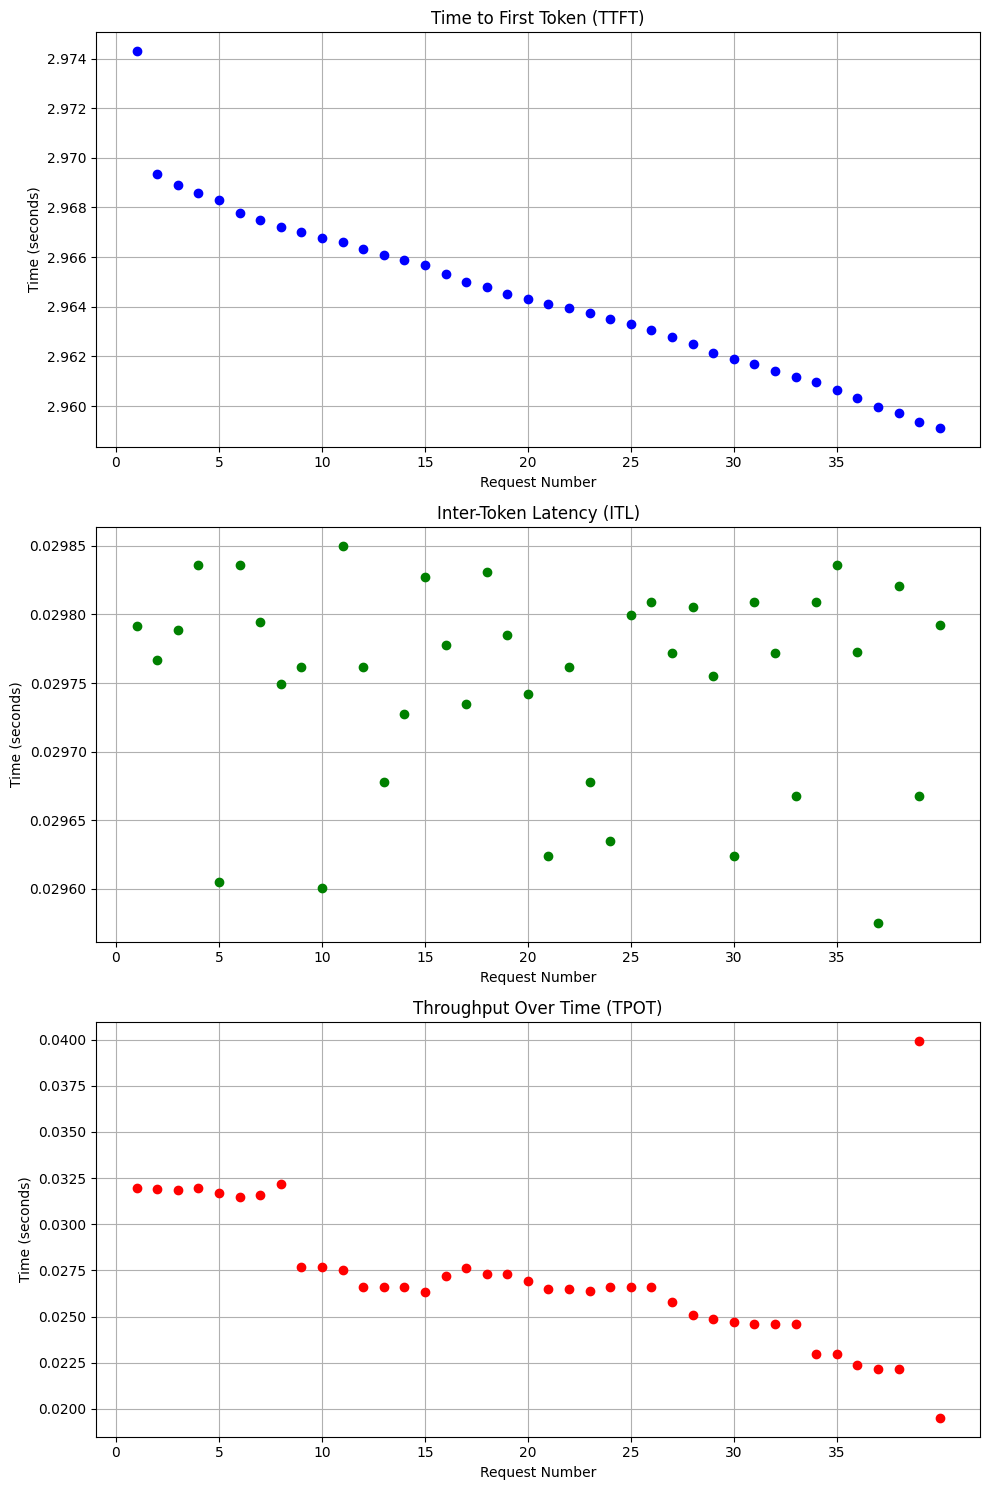

In [31]:
filename = "/home/hkngae/vllm/fypStats/remote_800MB/stat_40.txt"
num_requests = 40
mai(filename, num_requests)

Processing 80 requests from file: /home/hkngae/vllm/fypStats/remote_800MB/stat_80.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=3.149116s, max=26.868797s, avg=13.886663s
ITL:  min=0.029680s, max=0.035381s, avg=0.032350s
TPOT: min=0.019687s, max=0.308533s, avg=0.052305s
Plot saved as: /home/hkngae/vllm/fypStats/remote_800MB/stat_80_plot.png


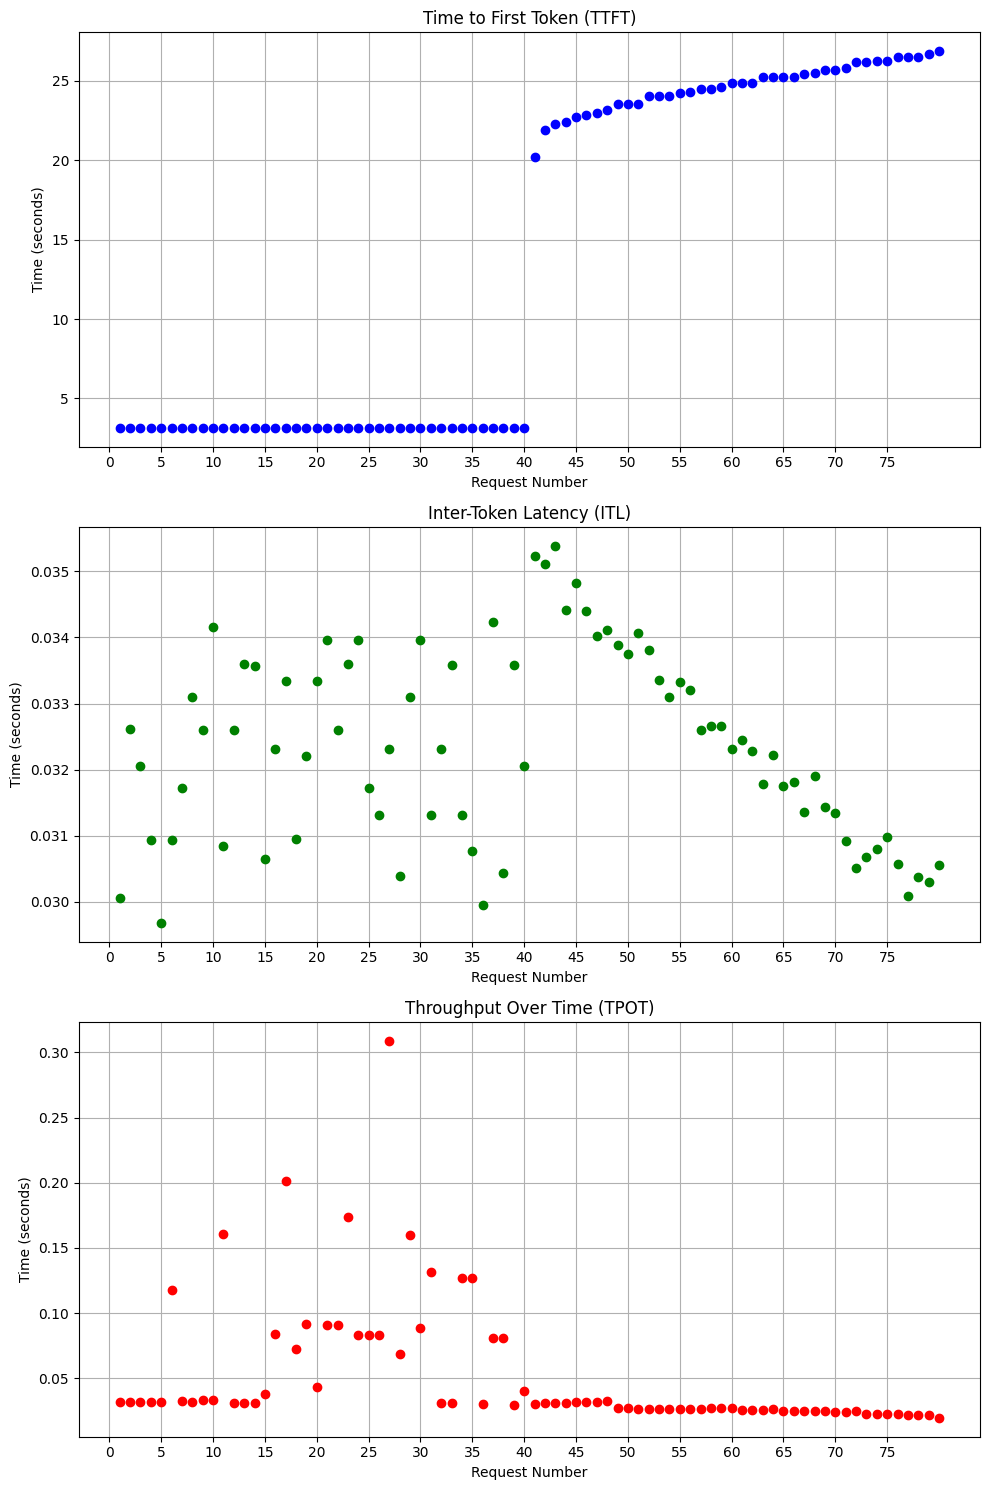

In [32]:
filename = "/home/hkngae/vllm/fypStats/remote_800MB/stat_80.txt"
num_requests = 80
mai(filename, num_requests)

Processing 160 requests from file: /home/hkngae/vllm/fypStats/remote_800MB/stat_160.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=3.247624s, max=71.512546s, avg=35.428663s
ITL:  min=0.028925s, max=0.035539s, avg=0.032573s
TPOT: min=0.019451s, max=0.256951s, avg=0.047011s
Plot saved as: /home/hkngae/vllm/fypStats/remote_800MB/stat_160_plot.png


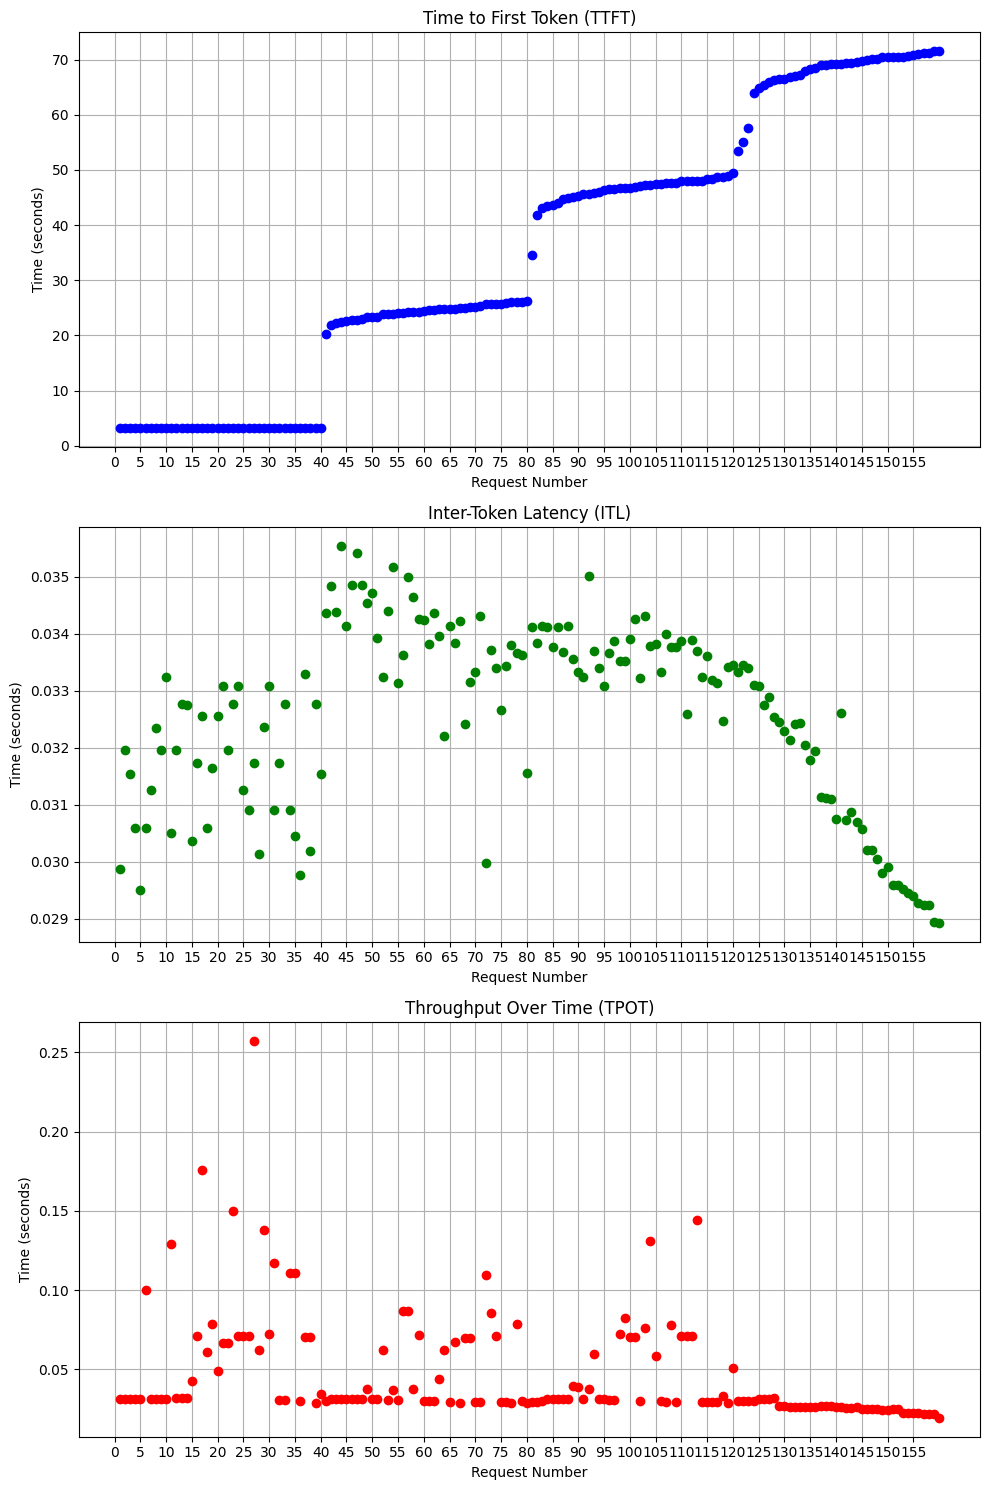

In [33]:
filename = "/home/hkngae/vllm/fypStats/remote_800MB/stat_160.txt"
num_requests = 160
mai(filename, num_requests)